In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Librerías de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


In [3]:
pip install --upgrade pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade scikit-learn

In [5]:
# Cargar los cuatro archivos CSV en cuatro DataFrames diferentes

df4 = pd.read_csv('df_4t_2016.csv')

df8 = pd.read_csv('df_4t_2017.csv')

df12= pd.read_csv('df_4t_2018.csv')

df16 = pd.read_csv('df_4t_2019.csv')


# Unir los DataFrames en uno solo
# Puedes elegir el método de unión (inner, outer, left, right) según tus necesidades
# En este caso, estoy usando concat para concatenar los DataFrames verticalmente (por filas)
df = pd.concat([df4, df8, df12,df16], axis=0, ignore_index=True)

# Mostrar el DataFrame resultante
print(df)


        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          4      748817  Santa Cruz   Si  Hombre    56   
1          2016          4      748821  Santa Cruz   Si   Mujer    37   
2          2016          4      748824  Santa Cruz   Si  Hombre    46   
3          2016          4      748825  Santa Cruz   Si   Mujer    42   
4          2016          4      748826  Santa Cruz   Si  Hombre    20   
...         ...        ...         ...         ...  ...     ...   ...   
113452     2019          4     2913894      La Paz   Si   Mujer    52   
113453     2019          4     2913895      La Paz   Si  Hombre    25   
113454     2019          4     2913896      La Paz   Si   Mujer    22   
113455     2019          4     2913898      La Paz   Si  Hombre    28   
113456     2019          4     2913899      La Paz   Si   Mujer    29   

                         s1_05                 Niv_Ed  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   
1        

In [6]:
df.dtypes

gestion                int64
trimestre              int64
id_persona             int64
depto                 object
peao                  object
Genero                object
Edad                   int64
s1_05                 object
Niv_Ed                object
Est_Civ               object
Nacionalidad          object
ocupacion             object
Trabaja               object
Cont_Trab             object
condact               object
phrs                  object
Segundo_Trab          object
Aporta_Hog            object
tiempo_trab_meses     object
ingresos             float64
pagos_extra           object
tasa_desempleo       float64
dtype: object

In [7]:
# Consulta para obtener los valores de tasa de desempleo por gestión
valores_tasa_desempleo = df.groupby('gestion')['tasa_desempleo'].unique()

# Imprimir los valores de tasa de desempleo por gestión
print(valores_tasa_desempleo)

gestion
2016    [3.8970376761576073]
2017     [4.132619856822619]
2018     [3.784708322719167]
2019     [4.188661923341749]
Name: tasa_desempleo, dtype: object


In [8]:
# Nuevos valores a reemplazar
nuevos_valores = {
    2016: 4.42,
    2017: 4.51,
    2018: 4.27,
    2019: 4.83
}

# Reemplazar los valores en la columna 'tasa_desempleo'
df['tasa_desempleo'] = df['gestion'].replace(nuevos_valores)

# Imprimir el DataFrame actualizado
print(df)

        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          4      748817  Santa Cruz   Si  Hombre    56   
1          2016          4      748821  Santa Cruz   Si   Mujer    37   
2          2016          4      748824  Santa Cruz   Si  Hombre    46   
3          2016          4      748825  Santa Cruz   Si   Mujer    42   
4          2016          4      748826  Santa Cruz   Si  Hombre    20   
...         ...        ...         ...         ...  ...     ...   ...   
113452     2019          4     2913894      La Paz   Si   Mujer    52   
113453     2019          4     2913895      La Paz   Si  Hombre    25   
113454     2019          4     2913896      La Paz   Si   Mujer    22   
113455     2019          4     2913898      La Paz   Si  Hombre    28   
113456     2019          4     2913899      La Paz   Si   Mujer    29   

                         s1_05                 Niv_Ed  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   
1        

In [9]:
df = df[df['s1_05'] != 'EMPLEADA/O DEL HOGAR CAMA ADENTRO']

In [10]:
valores_s1_05= df['s1_05'].unique()
print(valores_s1_05)

['JEFE O JEFA DEL HOGAR' 'ESPOSA/O O CONVIVIENTE' 'HIJO/A O ENTENADO/A'
 'YERNO O NUERA' 'PADRES' 'HERMANO/A O CUÑADO/A' 'OTRO QUE NO ES PARIENTE'
 'NIETO/NIETA' 'OTRO PARIENTE' 'SUEGROS'
 'PARIENTE DE LA EMPLEADA/O DEL HOGAR']


In [11]:
df['s1_05'] = df['s1_05'].replace(['HERMANO/A O CUÑADO/A', 'HERMANO/A O CUï¿½DO', 'HERMANO/A O CUï¿½ADO', 'HERMANO/A O CUÑDO/A'], 'HERMANO/A O CUÑADO/A')
df['s1_05'] = df['s1_05'].replace(['PARIENTE DE LA EMPLEADA/O DEL HOGAR' ], 'OTRO QUE NO ES PARIENTE')
df['s1_05'] = df['s1_05'].replace(['PADRES', 'SUEGROS'], 'PADRES/SUEGROS')

In [12]:
valores_ocupacion= df['ocupacion'].unique()
print(valores_ocupacion)

['Trabajadores de Servicio y Vendedores'
 'Directivos Adm. Pública y Empresas' 'Trabajadores No Calificados'
 'Trabajadores de la Construcción, Ind. Manufacturera y Otros'
 'Operadores de Instalaciones y Maquinarias' 'Empleados de oficina'
 'Sin ocupacion' 'Profesionales cientificos e intelectuales'
 'Técnicos de Nivel Medio'
 'Trabajadores en Agricultura, Pecuaria, Pesca y otros' 'Fuerzas Armadas'
 'Estudiante' 'Otro (Especifique)'
 'Ama de casa/ responsable de los quehaceres del hogar' 'Sin especificar'
 'Trabajadores en Agricultura, Pecuaria,Pesca y otros']


In [13]:
df = df[~df['ocupacion'].isin(['Ama de casa/ responsable de los quehaceres del hogar', 'Estudiante', 'Persona de edad avanzada'])]

In [14]:
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'], 'Trabajadores de la Construcción, Ind. Manufacturera y Otros')
df['ocupacion'] = df['ocupacion'].replace(['Jubilado / Benemï¿½ri'], 'Jubilado / Benemérito')
df['ocupacion'] = df['ocupacion'].replace(['Tï¿½cnicos de Nivel Med'], 'Técnicos de Nivel Medio')
df['ocupacion'] = df['ocupacion'].replace(['Directivos Adm. Pï¿½blica y Empres'], 'Directivos Adm. Pública y Empresas')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores en Agricultura, Pecuaria, Pesca y otros'], 'Trabajadores en Agricultura, Pecuaria,Pesca y otros')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores No Calificados', 'Otro (Especifique)','Técnicos de Nivel Medio','Sin especificar'], 'Otro')


In [15]:
valores_Est_civ= df['Est_Civ'].unique()
print(valores_Est_civ)

['SEPARADO/A' 'VIUDO/A' 'CONVIVIENTE O CONCUBINO/A' 'SOLTERO/A' 'CASADO/A'
 'DIVORCIADO/A']


In [16]:
df['Est_Civ'] = df['Est_Civ'].replace(['CONVIVIENTE O CONCUBINO/A'], 'CASADO/A')
df['Est_Civ'] = df['Est_Civ'].replace(['DIVORCIADO/A'], 'SEPARADO/A')

In [17]:
valores_Segundo_Trab= df['Segundo_Trab'].unique()
print(valores_Segundo_Trab)

['Si' 'No']


In [18]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [19]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

[0 1 '0' '1' ' ']


In [20]:
import numpy as np

# Diccionario de mapeo actualizado para incluir 0, 1 y espacio en blanco
nacionalidad_mapping = {'0': 'Boliviano/a', '1': 'Extranjero/a', 0: 'Boliviano/a', 1: 'Extranjero/a', ' ': np.nan}

# Aplicar el mapeo a la columna nacionalidad
df['Nacionalidad'] = df['Nacionalidad'].map(nacionalidad_mapping)

# Eliminar filas donde la nacionalidad es nula
df = df.dropna(subset=['Nacionalidad'])

In [21]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

['Boliviano/a' 'Extranjero/a']


In [22]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [23]:
valores_Niv_Ed= df['Niv_Ed'].unique()
print(valores_Niv_Ed)

['Secundaria completa' 'Secundaria incompleta' 'Primaria incompleta'
 'Primaria completa' 'Superior' 'Ninguno' 'Otros' 'Sin especificar']


In [24]:
df = df[(df['Niv_Ed'].str.strip() != '') & (df['Niv_Ed'] != 'Otros')]

In [25]:
valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

['360.030' '10.010' '192.016' ... 150 86 840]


In [26]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [27]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [28]:
df.shape

(111938, 22)

In [29]:
# Convertir 'phrs' a tipo string
df['phrs'] = df['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df['phrs'] = df['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df['phrs'] = pd.to_numeric(df['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df['ingresos'] = df['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df['ingresos'] = df['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df['tiempo_trab_meses'] = pd.to_numeric(df['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df)



        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          4      748817  Santa Cruz   Si  Hombre    56   
1          2016          4      748821  Santa Cruz   Si   Mujer    37   
2          2016          4      748824  Santa Cruz   Si  Hombre    46   
3          2016          4      748825  Santa Cruz   Si   Mujer    42   
4          2016          4      748826  Santa Cruz   Si  Hombre    20   
...         ...        ...         ...         ...  ...     ...   ...   
113452     2019          4     2913894      La Paz   Si   Mujer    52   
113453     2019          4     2913895      La Paz   Si  Hombre    25   
113454     2019          4     2913896      La Paz   Si   Mujer    22   
113455     2019          4     2913898      La Paz   Si  Hombre    28   
113456     2019          4     2913899      La Paz   Si   Mujer    29   

                         s1_05                 Niv_Ed     Est_Civ  ...  \
0        JEFE O JEFA DEL HOGAR    Secundaria comp

In [30]:
valores_phrs= df['phrs'].unique()
print(valores_phrs)

valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

valores_ingresos= df['ingresos'].unique()
print(valores_ingresos)

[ 36.     30.     48.     16.      5.      4.     84.     42.     60.
  52.     98.     25.     56.      9.     44.      0.     91.     55.
  12.     28.     54.     16.5    72.     18.     40.     70.     66.
   8.    105.     49.      6.     24.     75.     15.     35.     50.
   3.     20.     22.5    77.     45.     63.     32.     10.     49.5
  14.     22.     42.5    96.     27.     27.5     2.     80.     33.
  21.     13.     39.     78.     32.5    90.     47.5    17.5    58.5
 112.      7.     84.5    65.     46.75   38.5    51.     57.      1.
  60.5    64.      7.5    25.5    71.5    26.     10.5    97.5    80.5
 102.      3.5    85.     89.25   24.5    45.5    52.5    11.     66.5
  24.75   23.625  13.5    37.5    31.5    74.75   26.25   12.5    43.75
  23.75   88.     19.5    68.75    4.5    68.     59.5   108.     57.75
  34.     40.25  108.5    17.     28.5    30.25   41.25   52.25   38.
  21.25   28.75   18.75   69.     73.5    48.75    1.5     2.5    55.25
   5.5    

In [31]:
df.info

<bound method DataFrame.info of         gestion  trimestre  id_persona       depto peao  Genero  Edad  \
0          2016          4      748817  Santa Cruz   Si  Hombre    56   
1          2016          4      748821  Santa Cruz   Si   Mujer    37   
2          2016          4      748824  Santa Cruz   Si  Hombre    46   
3          2016          4      748825  Santa Cruz   Si   Mujer    42   
4          2016          4      748826  Santa Cruz   Si  Hombre    20   
...         ...        ...         ...         ...  ...     ...   ...   
113452     2019          4     2913894      La Paz   Si   Mujer    52   
113453     2019          4     2913895      La Paz   Si  Hombre    25   
113454     2019          4     2913896      La Paz   Si   Mujer    22   
113455     2019          4     2913898      La Paz   Si  Hombre    28   
113456     2019          4     2913899      La Paz   Si   Mujer    29   

                         s1_05                 Niv_Ed     Est_Civ  ...  \
0        JEFE O J

In [32]:
# Eliminar filas donde 'ingresos' es inferior a o superior a 15000 (sin incluir el valor 0)
df = df[((df['ingresos'] == 0) | ((df['ingresos'] > 0) & (df['ingresos'] >= 1996) & (df['ingresos'] <= 15000)))]

# Eliminar filas donde el valor es mayor a 300 incluir el valor 0)
df = df[(df['tiempo_trab_meses'].notnull()) & (df['tiempo_trab_meses'] >= 0) & (df['tiempo_trab_meses'] <= 300)]

In [33]:
df.shape

(61244, 22)

In [34]:
# Definir los límites para la categorización de ingresos
ingresos_bins = [-float('inf'), 1, 3000, 7000, float('inf')]
ingresos_labels = ['Sin ingresos', 'Bajo', 'Medio', 'Alto']

# Categorizar ingresos
df['ingresos_categoria'] = pd.cut(df['ingresos'], bins=ingresos_bins, labels=ingresos_labels, right=False)

# Definir los límites para la categorización de tiempo trabajado
tiempo_trab_bins = [-float('inf'), 1, 24, 96, float('inf')]
tiempo_trab_labels = ['Sin experiencia', 'Corto', 'Medio', 'Largo']

# Categorizar tiempo trabajado
df['tiempo_trab_categoria'] = pd.cut(df['tiempo_trab_meses'], bins=tiempo_trab_bins, labels=tiempo_trab_labels, right=False)

# Definir los límites para la categorización de phrs
phrs_bins = [-float('inf'), 0, 40, 50, float('inf')]
phrs_labels = ['Sin horas', 'Parcial', 'Completo', 'Extra']

# Categorizar 'phrs' y crear la nueva columna 'phrs_categoria'
df['phrs_categoria'] = pd.cut(df['phrs'], bins=phrs_bins, labels=phrs_labels, right=False)

# Asignar la categoría 'Sin horas' a las filas donde 'phrs' es nulo
df.loc[df['phrs']== 0, 'phrs_categoria'] = 'Sin horas'

df.head()


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
2,2016,4,748824,Santa Cruz,Si,Hombre,46,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,48.0,No,Si,192.016,4000.0,No,4.42,Medio,Largo,Completo
3,2016,4,748825,Santa Cruz,Si,Mujer,42,ESPOSA/O O CONVIVIENTE,Primaria incompleta,CASADO/A,...,16.0,No,Si,8.020,3000.0,Si,4.42,Medio,Corto,Parcial
4,2016,4,748826,Santa Cruz,Si,Hombre,20,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,5.0,No,No,120.010,0.0,No,4.42,Sin ingresos,Largo,Parcial
5,2016,4,748827,Santa Cruz,Si,Hombre,18,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,4.0,No,No,96.080,0.0,No,4.42,Sin ingresos,Largo,Parcial
6,2016,4,748831,Santa Cruz,Si,Hombre,56,JEFE O JEFA DEL HOGAR,Secundaria completa,CASADO/A,...,84.0,No,Si,240.020,3000.0,No,4.42,Medio,Largo,Extra


In [35]:
# Contar el número de casos en cada categoría para 'ingresos_categoria'
conteo_ingresos = df['ingresos_categoria'].value_counts()

# Mostrar los resultados para 'ingresos_categoria'
print("Conteo de casos para 'ingresos_categoria':")
print(conteo_ingresos)
print()

# Contar el número de casos en cada categoría para 'tiempo_trab_categoria'
conteo_tiempo_trab = df['tiempo_trab_categoria'].value_counts()

# Mostrar los resultados para 'tiempo_trab_categoria'
print("Conteo de casos para 'tiempo_trab_categoria':")
print(conteo_tiempo_trab)
print()

# Contar el número de casos en cada categoría para 'phrs_categoria'
conteo_phrs = df['phrs_categoria'].value_counts()

# Mostrar los resultados para 'phrs_categoria'
print("Conteo de casos para 'phrs_categoria':")
print(conteo_phrs)

Conteo de casos para 'ingresos_categoria':
ingresos_categoria
Medio           24624
Bajo            16916
Sin ingresos    16592
Alto             3112
Name: count, dtype: int64

Conteo de casos para 'tiempo_trab_categoria':
tiempo_trab_categoria
Medio              21269
Largo              18451
Corto              16372
Sin experiencia     5152
Name: count, dtype: int64

Conteo de casos para 'phrs_categoria':
phrs_categoria
Completo     25102
Parcial      19189
Extra        12641
Sin horas     4312
Name: count, dtype: int64


In [36]:
valores_ingresos_categoria= df['ingresos_categoria'].unique()
print(valores_ingresos_categoria)

['Medio', 'Sin ingresos', 'Bajo', 'Alto']
Categories (4, object): ['Sin ingresos' < 'Bajo' < 'Medio' < 'Alto']


In [37]:
valores_tiempo_trab_categoria= df['tiempo_trab_categoria'].unique()
print(valores_tiempo_trab_categoria)

['Largo', 'Corto', 'Medio', 'Sin experiencia']
Categories (4, object): ['Sin experiencia' < 'Corto' < 'Medio' < 'Largo']


In [38]:
# Reemplaza los ceros con valores nulos (NaN) en las columnas 
df['phrs'] = df['phrs'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna ingresos
df['ingresos'] = df['ingresos'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna tiempo_trab_meses
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].replace(0, pd.NA)


df.head()

,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
2,2016,4,748824,Santa Cruz,Si,Hombre,46,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,48.0,No,Si,192.016,4000.0,No,4.42,Medio,Largo,Completo
3,2016,4,748825,Santa Cruz,Si,Mujer,42,ESPOSA/O O CONVIVIENTE,Primaria incompleta,CASADO/A,...,16.0,No,Si,8.02,3000.0,Si,4.42,Medio,Corto,Parcial
4,2016,4,748826,Santa Cruz,Si,Hombre,20,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,5.0,No,No,120.01,<NA>,No,4.42,Sin ingresos,Largo,Parcial
5,2016,4,748827,Santa Cruz,Si,Hombre,18,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,4.0,No,No,96.08,<NA>,No,4.42,Sin ingresos,Largo,Parcial
6,2016,4,748831,Santa Cruz,Si,Hombre,56,JEFE O JEFA DEL HOGAR,Secundaria completa,CASADO/A,...,84.0,No,Si,240.02,3000.0,No,4.42,Medio,Largo,Extra


In [39]:
limite_inferior_ingresos = df['ingresos'].min()
limite_superior_ingresos = df['ingresos'].max()

limite_inferior_tiempo_trab_meses = df['tiempo_trab_meses'].min()
limite_superior_tiempo_trab_meses = df['tiempo_trab_meses'].max()

print("Límite inferior de ingresos:", limite_inferior_ingresos)
print("Límite superior de ingresos:", limite_superior_ingresos)

print("Límite inferior de tiempo_trab_meses:", limite_inferior_tiempo_trab_meses)
print("Límite superior de tiempo_trab_meses:", limite_superior_tiempo_trab_meses)


Límite inferior de ingresos: 1999.3333333333333
Límite superior de ingresos: 15000.0
Límite inferior de tiempo_trab_meses: 1.0
Límite superior de tiempo_trab_meses: 300.0


## Tratamiento de valores atipicos por el metodo del rango intercuartil

Tratamiento de valores atípicos  para la columna phrs, ingresos y tiempo_trab_meses

Existen valores atipicos que fueron borrados por el procedimiento

Eliminación por rango intercuartileo

IQR = Q3 - Q1

LI = Q1 - 1.5 * (IQR)

LS = Q3 + 1.5 * (IQR)

In [40]:
df.shape

(61244, 25)

In [41]:
import pandas as pd

# Supongamos que 'phrs' es la columna que quieres convertir y filtrar
columna_a_corregir = 'phrs'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1 = df['phrs'].quantile(q=0.25)
Q3 = df['phrs'].quantile(q=0.75)
IQR = Q3 - Q1

# Filtrar filas basadas en el rango intercuartílico
df_1 = df[~((df['phrs'] < (Q1 - 1.5 * IQR)) | (df['phrs'] > (Q3 + 1.5 * IQR)))].copy()



In [42]:
df_1.shape

(59761, 25)

In [43]:
columna_a_corregir_ingresos = 'tiempo_trab_meses'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['tiempo_trab_meses'].quantile(q=0.25)
Q3_ingresos = df['tiempo_trab_meses'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['tiempo_trab_meses'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['tiempo_trab_meses'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [44]:
df_1.shape

(59249, 25)

In [45]:
columna_a_corregir_ingresos = 'ingresos'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['ingresos'].quantile(q=0.25)
Q3_ingresos = df['ingresos'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['ingresos'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['ingresos'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [46]:
df_1.shape

(57184, 25)

In [47]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 57184 entries, 2 to 113456
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                57184 non-null  int64   
 1   trimestre              57184 non-null  int64   
 2   id_persona             57184 non-null  int64   
 3   depto                  57184 non-null  object  
 4   peao                   57184 non-null  object  
 5   Genero                 57184 non-null  object  
 6   Edad                   57184 non-null  int64   
 7   s1_05                  57184 non-null  object  
 8   Niv_Ed                 57184 non-null  object  
 9   Est_Civ                57184 non-null  object  
 10  Nacionalidad           57184 non-null  object  
 11  ocupacion              57184 non-null  object  
 12  Trabaja                57184 non-null  object  
 13  Cont_Trab              57184 non-null  object  
 14  condact                57184 non-null  obj

In [48]:
import numpy as np

# Eliminar registros donde la edad es menor que el tiempo de trabajo en años y el tiempo de trabajo en años no es cero ni nulo
df_1 = df_1[(
    (df_1['Edad'] >= np.where(pd.isna(df_1['tiempo_trab_meses']), np.nan, df_1['tiempo_trab_meses'] / 12)) |
    (df_1['tiempo_trab_meses'].isna())
)]

# Mostrar las primeras filas del DataFrame resultante
df_1.head()



C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
2,2016,4,748824,Santa Cruz,Si,Hombre,46,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,48.0,No,Si,192.016,4000.0,No,4.42,Medio,Largo,Completo
3,2016,4,748825,Santa Cruz,Si,Mujer,42,ESPOSA/O O CONVIVIENTE,Primaria incompleta,CASADO/A,...,16.0,No,Si,8.02,3000.0,Si,4.42,Medio,Corto,Parcial
4,2016,4,748826,Santa Cruz,Si,Hombre,20,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,5.0,No,No,120.01,<NA>,No,4.42,Sin ingresos,Largo,Parcial
5,2016,4,748827,Santa Cruz,Si,Hombre,18,HIJO/A O ENTENADO/A,Secundaria completa,SOLTERO/A,...,4.0,No,No,96.08,<NA>,No,4.42,Sin ingresos,Largo,Parcial
7,2016,4,748832,Santa Cruz,Si,Mujer,43,ESPOSA/O O CONVIVIENTE,Primaria completa,CASADO/A,...,42.0,No,Si,8.08,4500.0,No,4.42,Medio,Corto,Completo


In [49]:
df_1['peao'].value_counts()

peao
Si    52633
No     4299
Name: count, dtype: int64

In [50]:
df_1.shape

(56932, 25)

In [51]:
# Convertir 'phrs' a tipo string
df_1['phrs'] = df_1['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df_1['phrs'] = df_1['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df_1['phrs'] = pd.to_numeric(df_1['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df_1['ingresos'] = df_1['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df_1['ingresos'] = df_1['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df_1['ingresos'] = pd.to_numeric(df_1['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df_1['tiempo_trab_meses'] = pd.to_numeric(df_1['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df_1)


        gestion  trimestre  id_persona       depto peao  Genero  Edad  \
2          2016          4      748824  Santa Cruz   Si  Hombre    46   
3          2016          4      748825  Santa Cruz   Si   Mujer    42   
4          2016          4      748826  Santa Cruz   Si  Hombre    20   
5          2016          4      748827  Santa Cruz   Si  Hombre    18   
7          2016          4      748832  Santa Cruz   Si   Mujer    43   
...         ...        ...         ...         ...  ...     ...   ...   
113437     2019          4     2913863      La Paz   Si   Mujer    54   
113438     2019          4     2913865      La Paz   Si  Hombre    55   
113440     2019          4     2913867      La Paz   Si   Mujer    36   
113454     2019          4     2913896      La Paz   Si   Mujer    22   
113456     2019          4     2913899      La Paz   Si   Mujer    29   

                         s1_05                 Niv_Ed    Est_Civ  ...  phrs  \
2        JEFE O JEFA DEL HOGAR  Secundaria i

In [52]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].isna() & df_1['phrs'].notna())]

In [53]:
df_1.shape

(56126, 25)

In [54]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].notna() &df_1['tiempo_trab_meses'].notna() & df_1['phrs'].isna())]

In [55]:
df_1.shape

(56114, 25)

In [56]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['tiempo_trab_categoria'].isin(['Largo','Medio', 'Corto'])))]

In [57]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['phrs_categoria'].isin(['Completo', 'Extra', 'Parcial'])))]

In [58]:
# Guardar el DataFrame en un archivo CSV
df_1.to_csv('df_4t.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [59]:
df_1.shape

(44661, 25)

# Analisis descriptivo
Variables numéricas
  

In [60]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,44661.000000,44661.0,4.466100e+04,44661.000000,40361.000000,40361.000000,40361.000000,44661.000000
mean,2017.585321,4.0,1.885940e+06,36.783077,43.360348,71.491414,3419.867372,4.501474
std,1.175033,0.0,7.783889e+05,12.024230,13.479653,74.074805,1252.789255,0.220940
min,2016.000000,4.0,7.488240e+05,14.000000,3.000000,1.000000,2000.000000,4.270000
25%,2016.000000,4.0,8.957510e+05,27.000000,40.000000,12.000000,2400.000000,4.270000
50%,2018.000000,4.0,2.127453e+06,35.000000,44.000000,44.000000,3000.000000,4.420000
75%,2019.000000,4.0,2.756869e+06,45.000000,48.000000,120.000000,4000.000000,4.830000
max,2019.000000,4.0,2.913863e+06,85.000000,75.000000,276.060000,7500.000000,4.830000


In [61]:
# Crea una lista de las variables numéricas
variables_numericas = ['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs', 'tasa_desempleo']

# Crea un DataFrame vacío para almacenar las estadísticas descriptivas
df_estadisticas = pd.DataFrame(columns=['Variable', 'Moda', 'Mediana', 'Media', 'Desviación estándar', 'Varianza', 'Coeficiente de variabilidad'])

# Calcula las estadísticas descriptivas para cada variable
for variable in variables_numericas:
    # Calcula la moda
    moda = df_1[variable].mode().iloc[0]

    # Calcula la mediana
    mediana = df_1[variable].median()

    # Calcula la media
    media = df_1[variable].mean()

    # Calcula la desviación estándar
    desviacion_estandar = df_1[variable].std()

    # Calcula la varianza
    varianza = desviacion_estandar**2

    # Calcula el coeficiente de variabilidad
    coef_variabilidad = (desviacion_estandar / media) * 100

    # Agrega las estadísticas a la tabla
    df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({
        'Variable': [variable],
        'Moda': [moda],
        'Mediana': [mediana],
        'Media': [media],
        'Desviación estándar': [desviacion_estandar],
        'Varianza': [varianza],
        'Coeficiente de variabilidad': [coef_variabilidad]
    })], ignore_index=True)

# Imprime la tabla
print(df_estadisticas.to_string(index=False))


         Variable    Moda  Mediana       Media  Desviación estándar     Varianza  Coeficiente de variabilidad
             Edad      30    35.00   36.783077            12.024230 1.445821e+02                    32.689570
tiempo_trab_meses   24.02    44.00   71.491414            74.074805 5.487077e+03                   103.613569
         ingresos  3000.0  3000.00 3419.867372          1252.789255 1.569481e+06                    36.632685
             phrs    48.0    44.00   43.360348            13.479653 1.817010e+02                    31.087511
   tasa_desempleo    4.27     4.42    4.501474             0.220940 4.881441e-02                     4.908167


C:\Users\win10\AppData\Local\Temp\ipykernel_8976\1069559067.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({


<IPython.core.display.Javascript object>


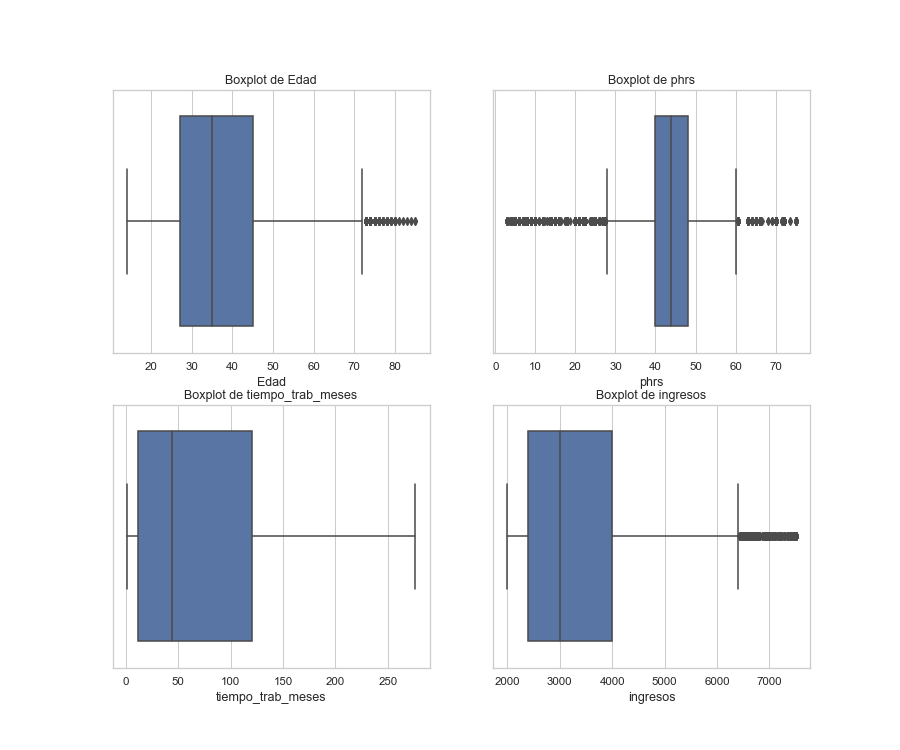

IndexError: index 2 is out of bounds for axis 0 with size 2

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Variables a incluir en los boxplots
variables_boxplot = ['Edad', 'phrs', 'tiempo_trab_meses', 'ingresos', 'tasa_desempleo']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterar sobre las variables y dibujar boxplots
for i, variable in enumerate(variables_boxplot):
    sns.boxplot(x=df_1[variable], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {variable}')

# Ajustes de diseño
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


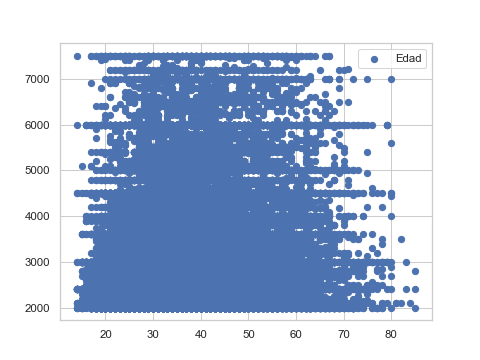

0.12940930515369314


In [63]:
# Crea un gráfico de dispersión
plt.figure()
plt.scatter(df_1['Edad'], df_1['ingresos'])

# Agrega una leyenda
plt.legend(['Edad', 'Ingresos'])

# Muestra el gráfico
plt.show()

# Copia el DataFrame para preservar el original
df_1_copia = df_1.copy()

# Elimina las filas con valores nulos en las columnas 'Edad' e 'Ingresos'
df_1_sin_nulos = df_1_copia.dropna(subset=['Edad', 'ingresos'])

# Calcula la correlación lineal
correlacion = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['ingresos'])[0, 1]
print(correlacion)



<IPython.core.display.Javascript object>


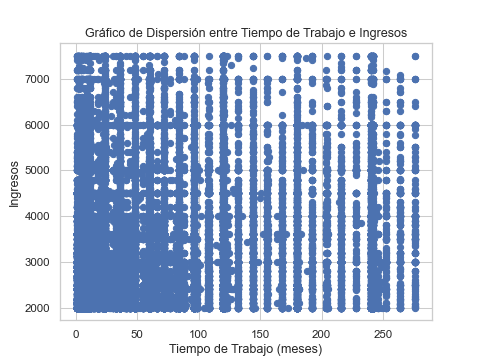

Correlación entre Tiempo de Trabajo e Ingresos: 0.14276535685763722


In [64]:
plt.figure()
plt.scatter(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])
plt.xlabel('Tiempo de Trabajo (meses)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre Tiempo de Trabajo e Ingresos')
plt.show()

correlacion_tt_ingresos = np.corrcoef(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre Tiempo de Trabajo e Ingresos:", correlacion_tt_ingresos)


<IPython.core.display.Javascript object>


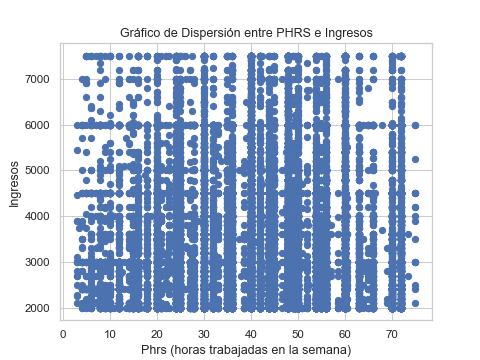

Correlación entre PHRS e Ingresos: -0.004453879644198117


In [65]:
plt.figure()
plt.scatter(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])
plt.xlabel('Phrs (horas trabajadas en la semana)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre PHRS e Ingresos')
plt.show()

correlacion_phrs_ingresos = np.corrcoef(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre PHRS e Ingresos:", correlacion_phrs_ingresos)


In [66]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,44661.000000,44661.0,4.466100e+04,44661.000000,40361.000000,40361.000000,40361.000000,44661.000000
mean,2017.585321,4.0,1.885940e+06,36.783077,43.360348,71.491414,3419.867372,4.501474
std,1.175033,0.0,7.783889e+05,12.024230,13.479653,74.074805,1252.789255,0.220940
min,2016.000000,4.0,7.488240e+05,14.000000,3.000000,1.000000,2000.000000,4.270000
25%,2016.000000,4.0,8.957510e+05,27.000000,40.000000,12.000000,2400.000000,4.270000
50%,2018.000000,4.0,2.127453e+06,35.000000,44.000000,44.000000,3000.000000,4.420000
75%,2019.000000,4.0,2.756869e+06,45.000000,48.000000,120.000000,4000.000000,4.830000
max,2019.000000,4.0,2.913863e+06,85.000000,75.000000,276.060000,7500.000000,4.830000


<IPython.core.display.Javascript object>


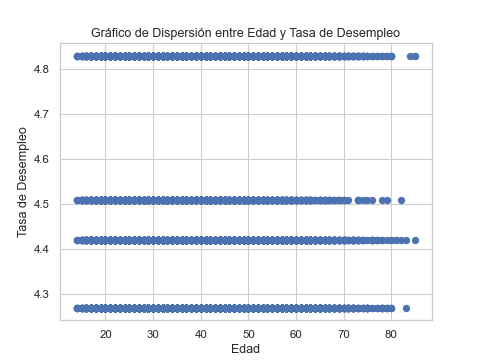

Correlación entre Edad y Tasa de Desempleo: -0.009428950185162314


In [67]:
plt.figure()
plt.scatter(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])
plt.xlabel('Edad')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico de Dispersión entre Edad y Tasa de Desempleo')
plt.show()

correlacion_edad_tasa_desempleo = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])[0, 1]
print("Correlación entre Edad y Tasa de Desempleo:", correlacion_edad_tasa_desempleo)


<IPython.core.display.Javascript object>


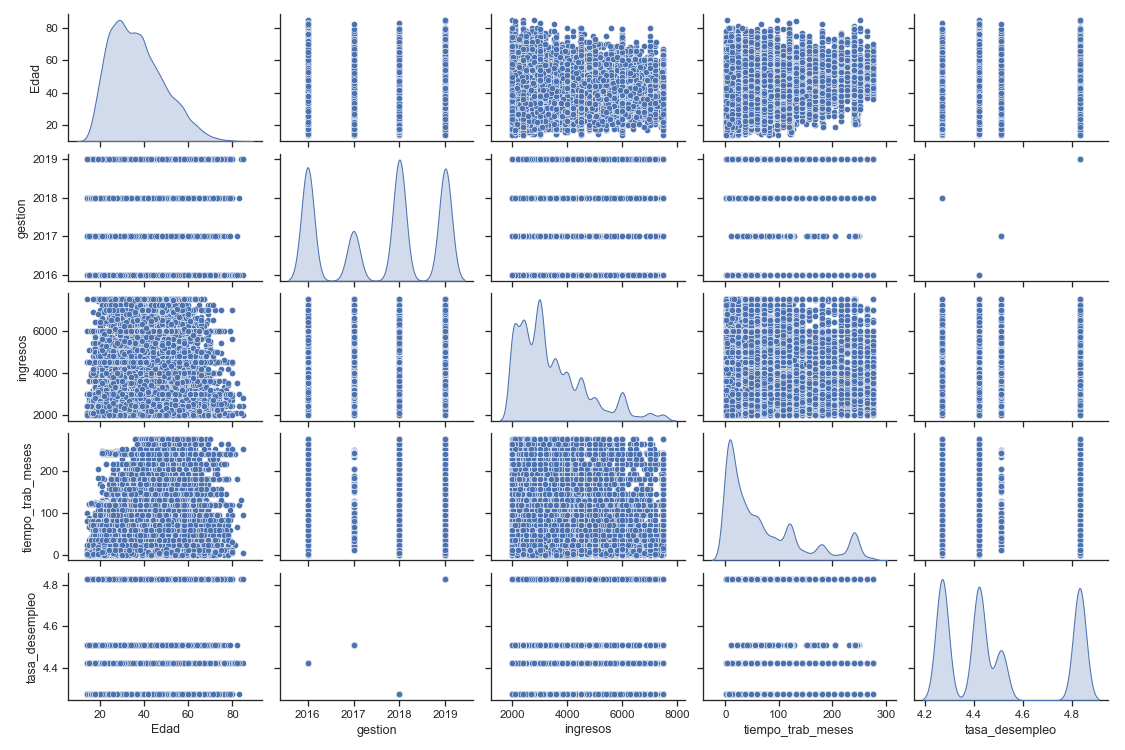

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes del DataFrame
columns_to_plot = ['Edad', 'gestion', 'ingresos', 'tiempo_trab_meses', 'tasa_desempleo']
data_to_plot = df_1[columns_to_plot]

# Configuración de tamaño y diseño
sns.set(style="ticks")
sns.pairplot(data_to_plot, height=2, aspect=1.5, diag_kind='kde')

plt.show()


<IPython.core.display.Javascript object>


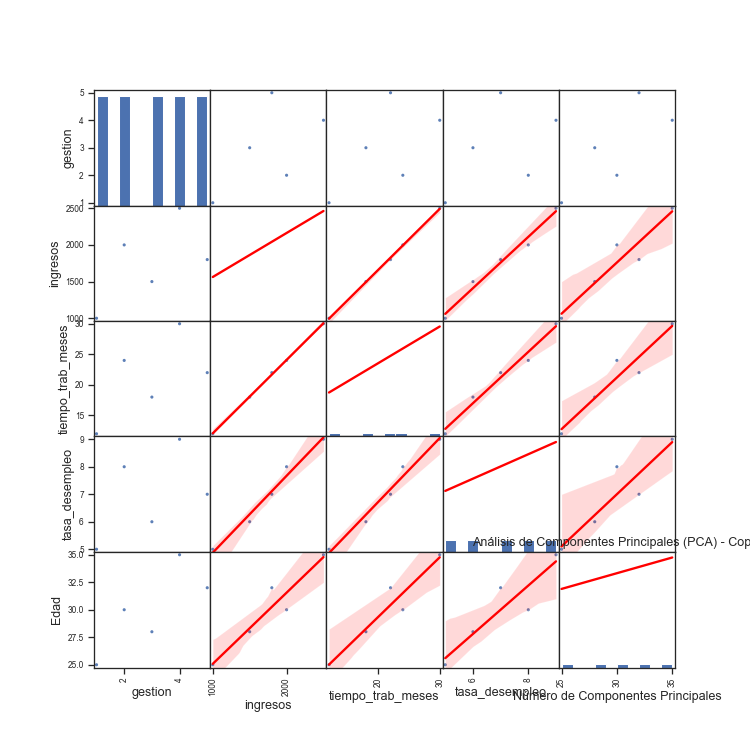

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'gestion': [1, 2, 3, 4, 5],
        'ingresos': [1000, 2000, 1500, 2500, 1800],
        'tiempo_trab_meses': [12, 24, 18, 30, 22],
        'tasa_desempleo': [5, 8, 6, 9, 7],
        'Edad': [25, 30, 28, 35, 32]} 

# Crear una copia del DataFrame original
df_copia = pd.DataFrame(data).copy(deep=True)

# Crear un gráfico de dispersión con líneas de tendencia
scatter_matrix = pd.plotting.scatter_matrix(df_copia, alpha=0.9, figsize=(10, 10))

# Agregar líneas de tendencia utilizando Seaborn
for i, ax_i in enumerate(scatter_matrix):
    for j, ax_j in enumerate(ax_i):
        # Obtener el nombre de las columnas en los ejes x e y
        x_col = df_copia.columns[j]
        y_col = df_copia.columns[i]
        
        # Agregar línea de tendencia solo si las columnas en los ejes x e y son diferentes de 'gestion'
        if x_col != 'gestion' and y_col != 'gestion':
            sns.regplot(x=df_copia[x_col], y=df_copia[y_col], scatter=False, ax=ax_j, color='red')

plt.show()



In [70]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,44661.000000,44661.0,4.466100e+04,44661.000000,40361.000000,40361.000000,40361.000000,44661.000000
mean,2017.585321,4.0,1.885940e+06,36.783077,43.360348,71.491414,3419.867372,4.501474
std,1.175033,0.0,7.783889e+05,12.024230,13.479653,74.074805,1252.789255,0.220940
min,2016.000000,4.0,7.488240e+05,14.000000,3.000000,1.000000,2000.000000,4.270000
25%,2016.000000,4.0,8.957510e+05,27.000000,40.000000,12.000000,2400.000000,4.270000
50%,2018.000000,4.0,2.127453e+06,35.000000,44.000000,44.000000,3000.000000,4.420000
75%,2019.000000,4.0,2.756869e+06,45.000000,48.000000,120.000000,4000.000000,4.830000
max,2019.000000,4.0,2.913863e+06,85.000000,75.000000,276.060000,7500.000000,4.830000


## Analisis de Componentes principales (PCA)

In [71]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_1_copy = df_1.copy()

# Seleccionar solo las variables numéricas en la copia
numeric_variables_copy = df_1_copy[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]

# Eliminar filas que contienen valores nulos en las columnas seleccionadas en la copia
numeric_variables_copy = numeric_variables_copy.dropna()

# Estandarizar las variables para que tengan media 0 y desviación estándar 1 (importante para PCA)
scaler = StandardScaler()
numeric_variables_standardized_copy = scaler.fit_transform(numeric_variables_copy)

# Crear un objeto PCA en la copia
pca_copy = PCA()

# Aplicar PCA a las variables estandarizadas en la copia
principal_components_copy = pca_copy.fit_transform(numeric_variables_standardized_copy)

# Obtener las proporciones de varianza explicada por cada componente principal en la copia
explained_variance_ratio_copy = pca_copy.explained_variance_ratio_

# Graficar la varianza explicada acumulativa en la copia
cumulative_explained_variance_copy = explained_variance_ratio_copy.cumsum()
plt.plot(range(1, len(cumulative_explained_variance_copy) + 1), cumulative_explained_variance_copy, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA) - Copia')
plt.show()


<IPython.core.display.Javascript object>


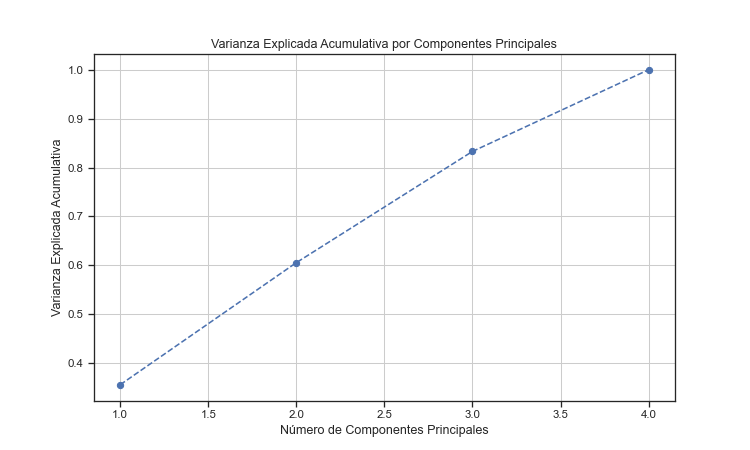

Proporción de Varianza Explicada por Componente Principal:
Componente Principal 1: 0.3559
Componente Principal 2: 0.2496
Componente Principal 3: 0.2275
Componente Principal 4: 0.1670


In [72]:
from sklearn.decomposition import PCA

# Crear un objeto PCA
pca = PCA()

# Aplicar PCA a las variables estandarizadas
pca_result = pca.fit_transform(numeric_variables_standardized_copy)

# Visualizar la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid(True)
plt.show()

# Imprimir las proporciones de varianza explicada por cada componente principal
print("Proporción de Varianza Explicada por Componente Principal:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Componente Principal {i}: {ratio:.4f}")


In [76]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Obtén los pesos (cargas) de las variables originales en cada componente principal
component_weights = pca_copy.components_

# Crea un DataFrame para mostrar los pesos
weights_df = pd.DataFrame(component_weights, columns=numeric_variables_copy.columns)

# Visualiza los pesos para cada componente principal
for i in range(len(weights_df)):
    print(f"\nComponente Principal {i+1}:\n{weights_df.iloc[i]}")




Componente Principal 1:
Edad                 0.635672
tiempo_trab_meses    0.645001
ingresos             0.412628
phrs                -0.098152
Name: 0, dtype: float64

Componente Principal 2:
Edad                -0.035475
tiempo_trab_meses    0.003498
ingresos            -0.184453
phrs                -0.982195
Name: 1, dtype: float64

Componente Principal 3:
Edad                -0.329157
tiempo_trab_meses   -0.269628
ingresos             0.891334
phrs                -0.156462
Name: 2, dtype: float64

Componente Principal 4:
Edad                 0.697366
tiempo_trab_meses   -0.715026
ingresos             0.035203
phrs                -0.034345
Name: 3, dtype: float64


## Modelo de Regresion de minimos cuadrados ordinarios OLS

In [77]:
import pandas as pd
import statsmodels.api as sm

# Importa tus datos
df_regresion = df_1

df_regresion = df_regresion.dropna(subset=["ingresos", "tiempo_trab_meses", "phrs", "tasa_desempleo"])

# Selecciona las variables independientes y la variable dependiente
X = df_regresion[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]
y = df_regresion["tasa_desempleo"]

# Crea el modelo de regresión
X = sm.add_constant(X)  # Agrega una constante al modelo
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.586
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           6.38e-07
Time:                        18:42:08   Log-Likelihood:                 3337.3
No. Observations:               40361   AIC:                            -6665.
Df Residuals:                   40356   BIC:                            -6622.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5081      0.00

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Obtén las predicciones del modelo
y_pred = model.predict(X)

# Calcular métricas de regresión
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22


## Factor de inflacion de la varianza y Tolerancia

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprime los resultados del VIF
print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)


Factor de Inflación de la Varianza (VIF):
            Variable        VIF
0              const  27.239205
1               Edad   1.132056
2  tiempo_trab_meses   1.137354
3           ingresos   1.028767
4               phrs   1.001630


In [80]:
# Calcula la tolerancia para cada variable independiente
tolerance = 1 / vif_data["VIF"]

# Agrega la tolerancia al DataFrame
vif_data["Tolerance"] = tolerance

# Imprime los resultados de la tolerancia
print("Tolerancia:")
print(vif_data)


Tolerancia:
            Variable        VIF  Tolerance
0              const  27.239205   0.036712
1               Edad   1.132056   0.883349
2  tiempo_trab_meses   1.137354   0.879234
3           ingresos   1.028767   0.972037
4               phrs   1.001630   0.998373


In [81]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Matriz de correlación de Pearson

<IPython.core.display.Javascript object>


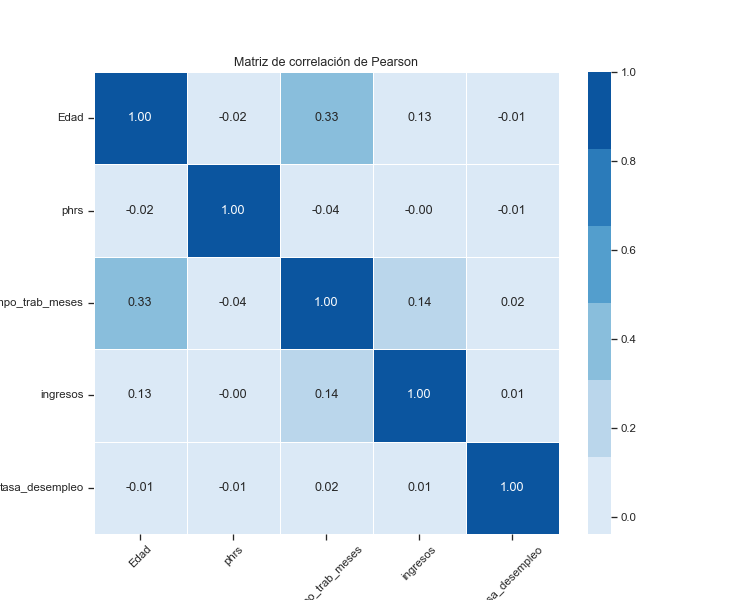

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las variables numéricas para el análisis de correlación
variables_numericas = ['Edad','phrs', 'tiempo_trab_meses', 'ingresos', 'tasa_desempleo']

# Crea una subconjunto del DataFrame solo con las variables seleccionadas
df_1_numericas = df_1[variables_numericas]

# Calcula la matriz de correlación de Pearson
matriz_correlacion = df_1_numericas.corr()

# Configuración de colores
colores = sns.color_palette("Blues")

# Crea el gráfico de mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap=colores, fmt=".2f", linewidths=.5)

# Agrega un título al gráfico
plt.title("Matriz de correlación de Pearson")

# Ajusta las etiquetas de los ejes
plt.xticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=45)
plt.yticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=0)

# Muestra el gráfico
plt.show()



In [83]:
%matplotlib inline

# Descriptivos para Variables Categóricas:

In [84]:
df_1.describe(include='object')

,depto,peao,Genero,s1_05,Niv_Ed,Est_Civ,Nacionalidad,ocupacion,Trabaja,Cont_Trab,condact,Segundo_Trab,Aporta_Hog,pagos_extra
count,44661,44661,44661,44661,44661,44661,44661,44661,44661,44661,44661,44661,44661,44661
unique,9,2,2,9,7,4,2,10,2,2,3,2,2,2
top,La Paz,Si,Hombre,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,Boliviano/a,"Trabajadores de la Construcción, Ind. Manufact...",Si,Si,Ocupado,No,Si,No
freq,10170,40362,29741,26492,18576,29635,44550,10747,38955,39652,40362,40683,39527,26598


In [85]:
df_1['peao'].value_counts()

peao
Si    40362
No     4299
Name: count, dtype: int64

In [86]:
import pandas as pd

# Supongamos que estas son las variables en tu DataFrame
variables_categoricas = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion',
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Calcular la frecuencia para cada variable categórica
for variable in variables_categoricas:
    frecuencia_variable = df_1[variable].value_counts()
    print(f"Frecuencia para {variable}:")
    print(frecuencia_variable)
    print()

# Calcular el porcentaje para cada variable categórica
for variable in variables_categoricas:
    porcentaje_variable = df_1[variable].value_counts(normalize=True) * 100
    print(f"Porcentaje para {variable}:")
    print(porcentaje_variable)
    print()


Frecuencia para depto:
depto
La Paz        10170
Santa Cruz     8992
Cochabamba     7717
Potosi         3950
Chuquisaca     3051
Beni           3046
Pando          2949
Tarija         2458
Oruro          2328
Name: count, dtype: int64

Frecuencia para peao:
peao
Si    40362
No     4299
Name: count, dtype: int64

Frecuencia para Genero:
Genero
Hombre    29741
Mujer     14920
Name: count, dtype: int64

Frecuencia para s1_05:
s1_05
JEFE O JEFA DEL HOGAR      26492
ESPOSA/O O CONVIVIENTE      8323
HIJO/A O ENTENADO/A         8315
HERMANO/A O CUÑADO/A         525
YERNO O NUERA                500
NIETO/NIETA                  212
OTRO PARIENTE                177
PADRES/SUEGROS                82
OTRO QUE NO ES PARIENTE       35
Name: count, dtype: int64

Frecuencia para Niv_Ed:
Niv_Ed
Superior                 18576
Secundaria completa       8806
Secundaria incompleta     7984
Primaria incompleta       5548
Primaria completa         3378
Ninguno                    366
Sin especificar           

<IPython.core.display.Javascript object>


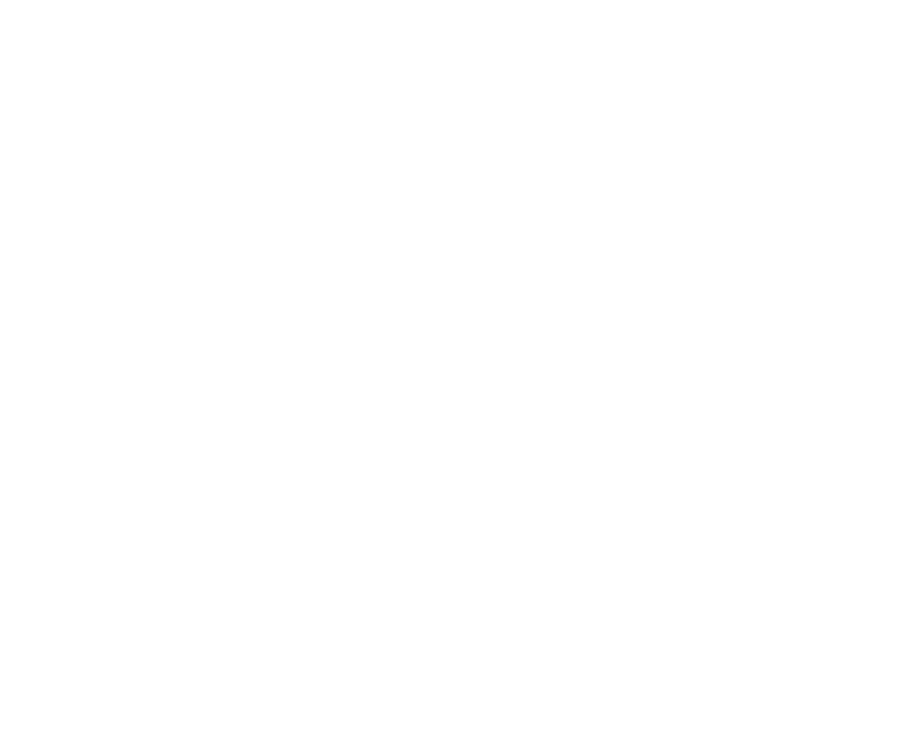

<IPython.core.display.Javascript object>


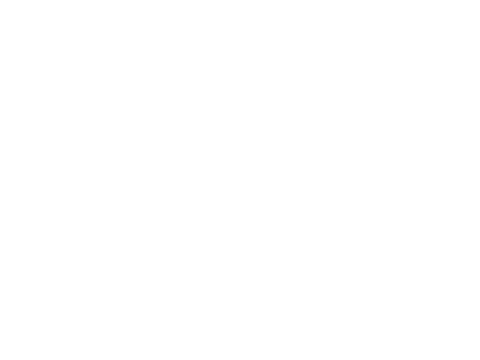

<IPython.core.display.Javascript object>


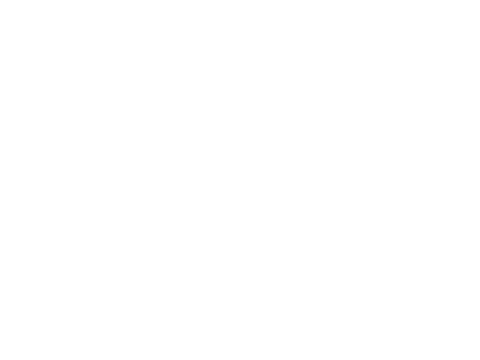

<IPython.core.display.Javascript object>


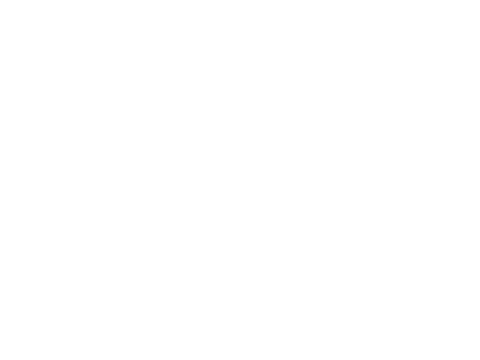

<IPython.core.display.Javascript object>


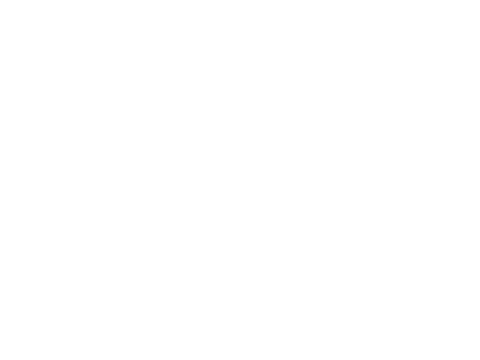

<IPython.core.display.Javascript object>


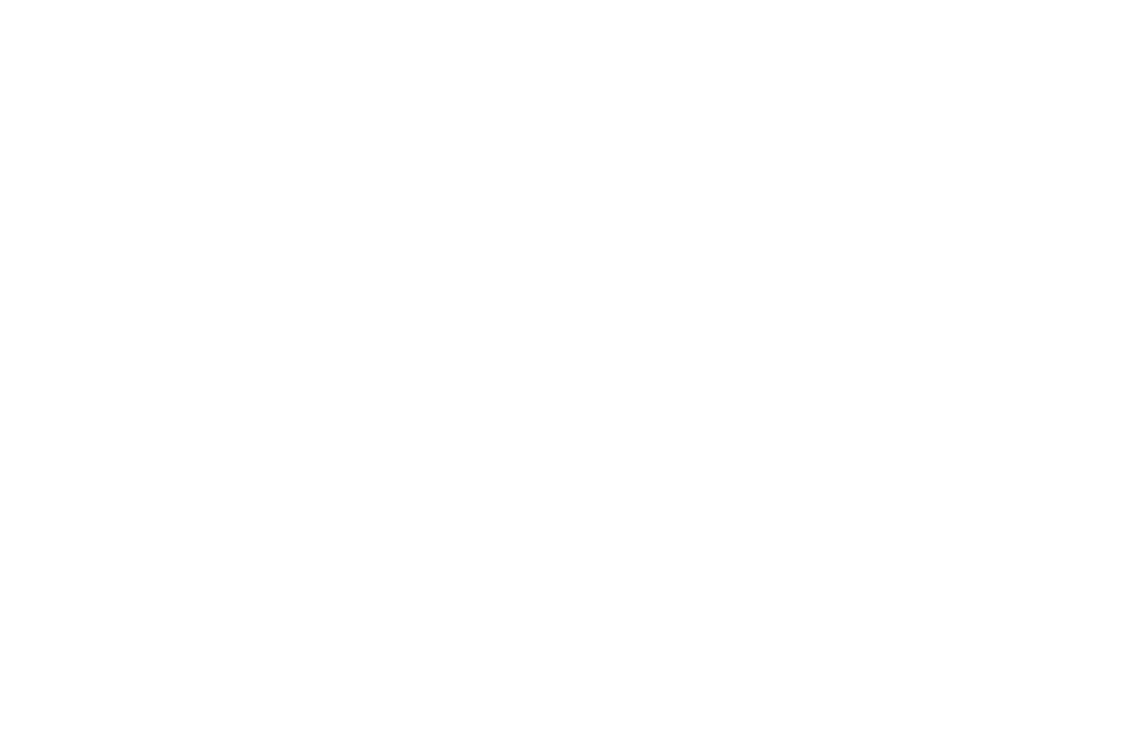

<IPython.core.display.Javascript object>


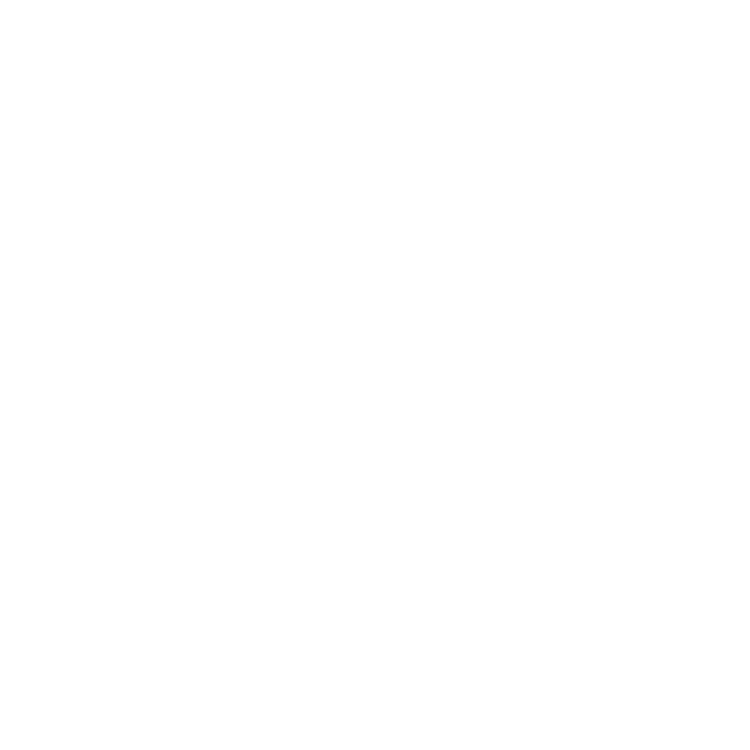

<IPython.core.display.Javascript object>


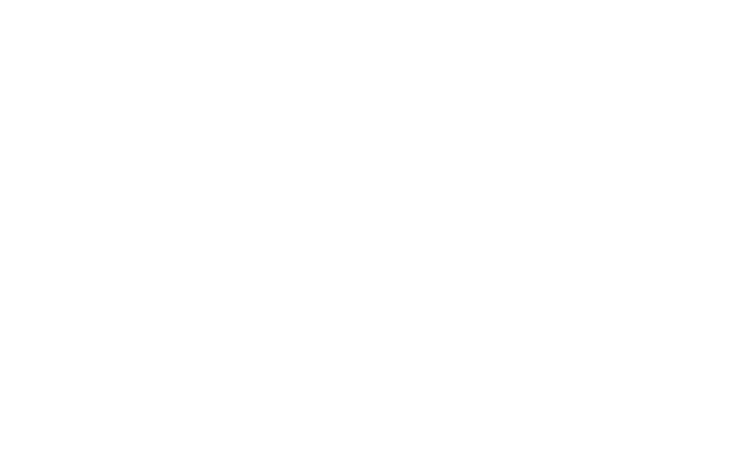

<IPython.core.display.Javascript object>


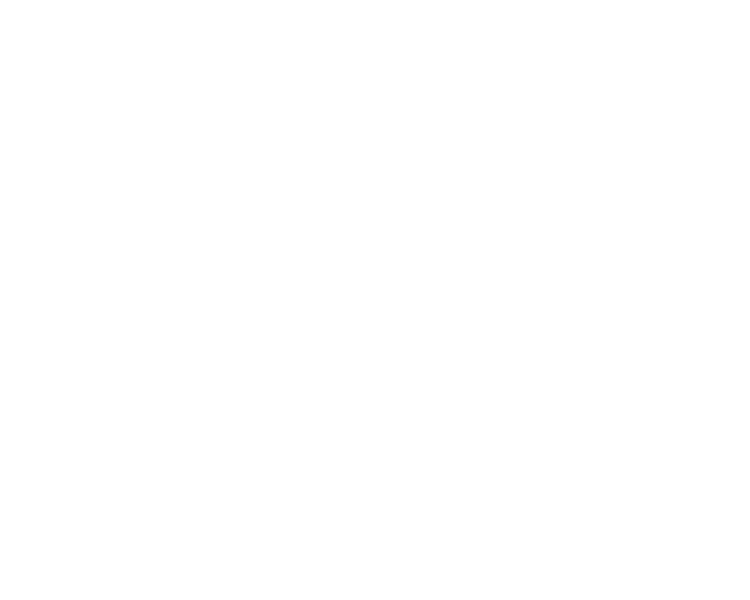

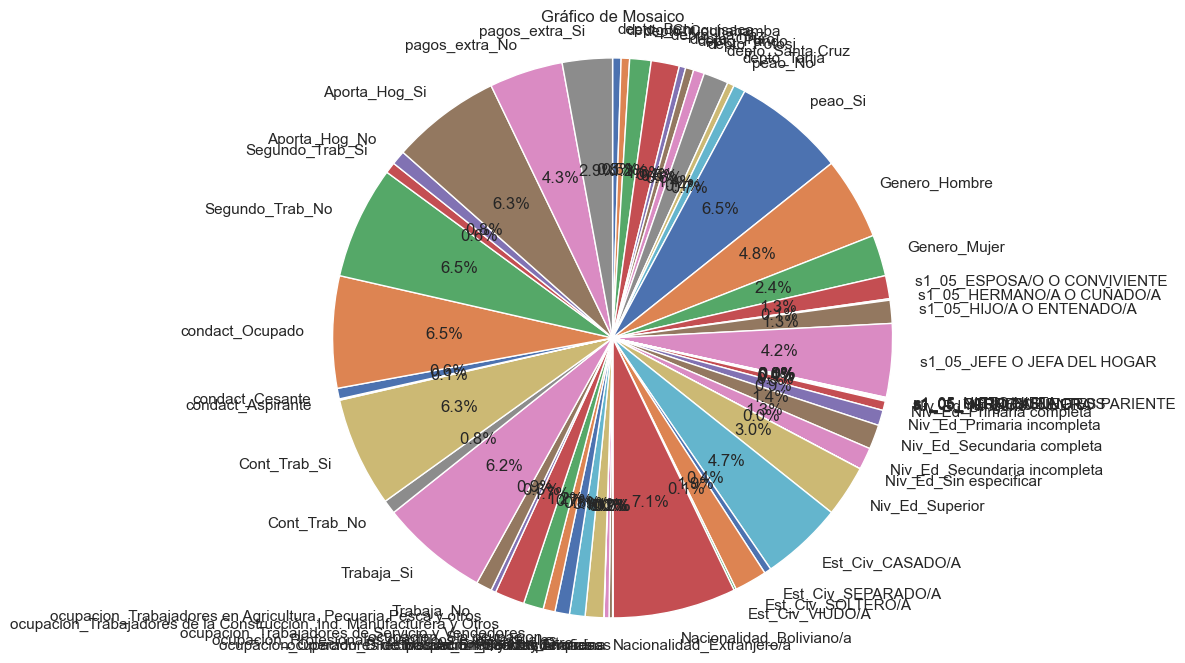

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_1 es tu DataFrame y variables_categoricas es la lista de columnas categóricas
df_subset = pd.get_dummies(df_1[variables_categoricas])

# Configurar el tamaño del gráfico si es necesario
plt.figure(figsize=(10, 8))

# Crear el gráfico de mosaico
plt.pie(df_subset.sum(), labels=df_subset.columns, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.title('Gráfico de Mosaico')
plt.show()


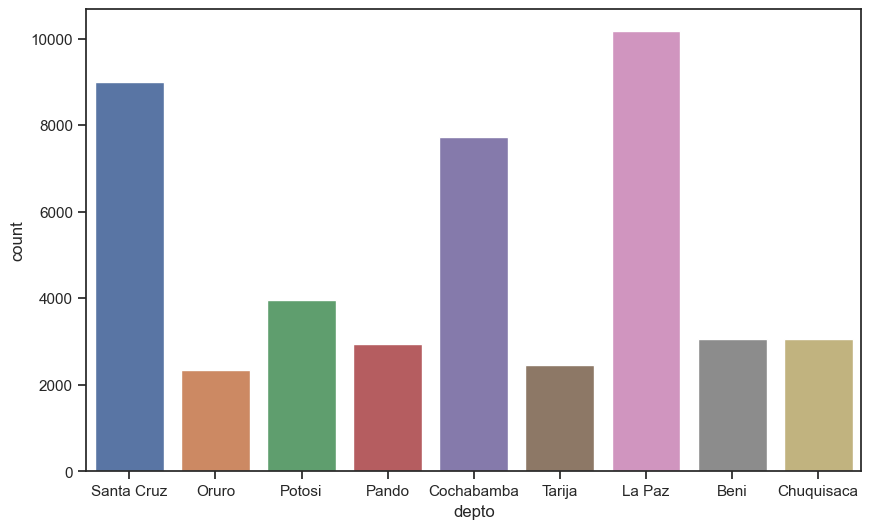

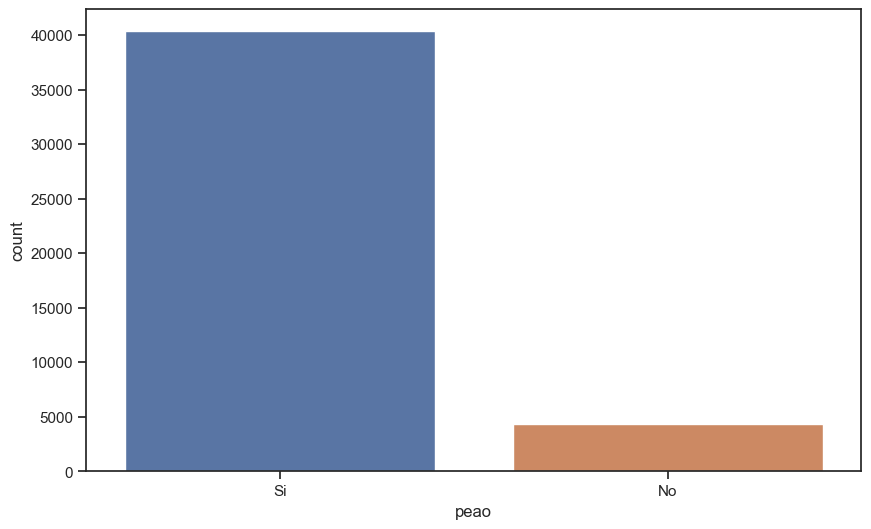

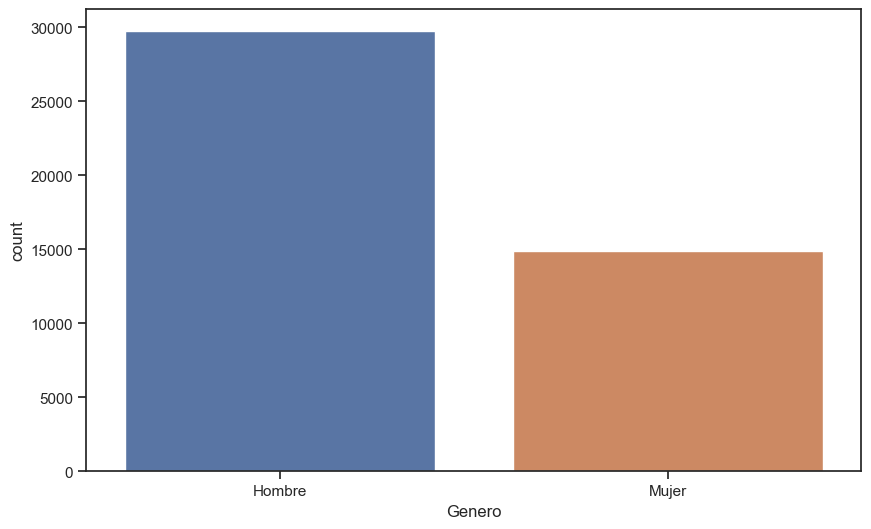

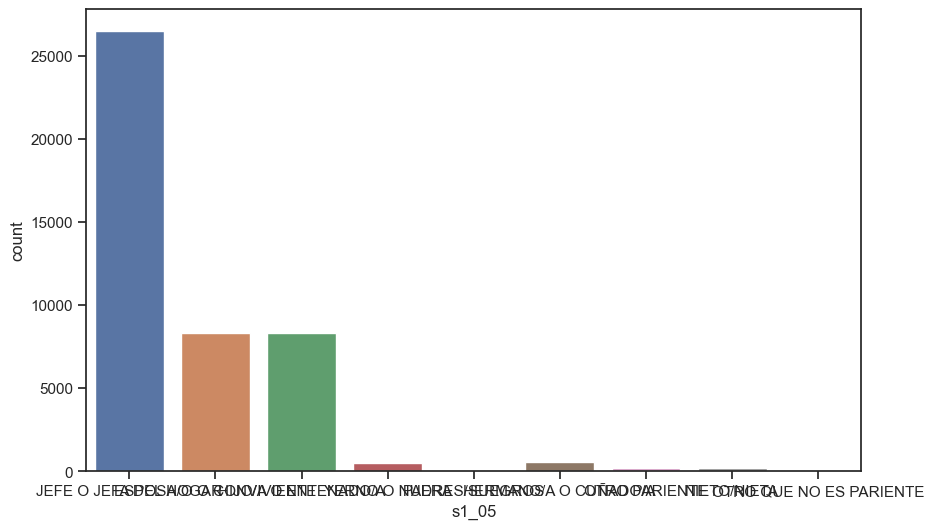

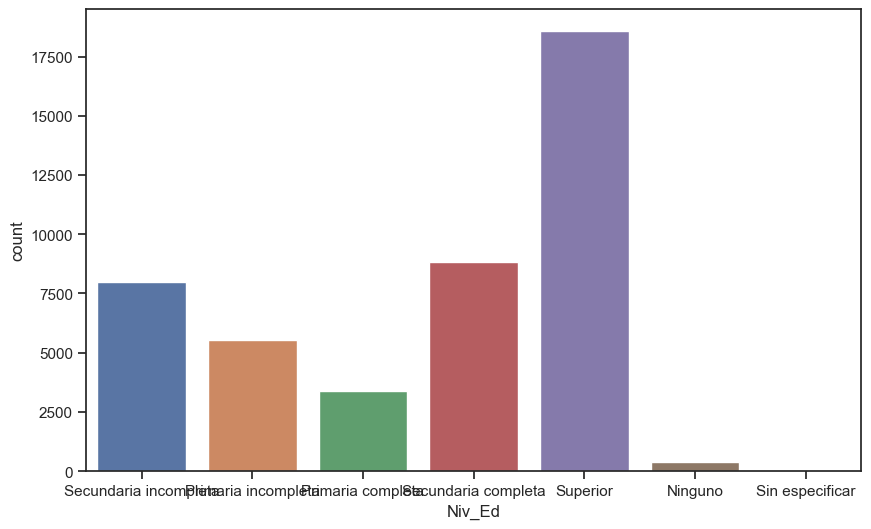

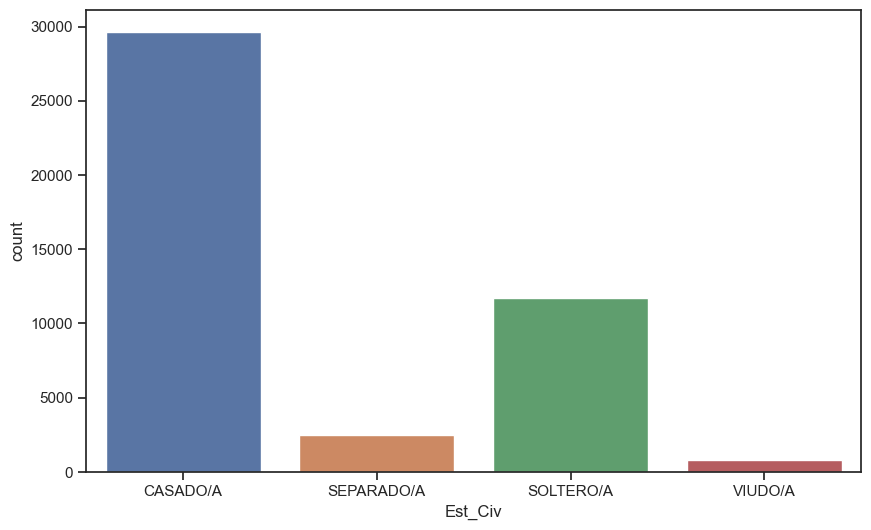

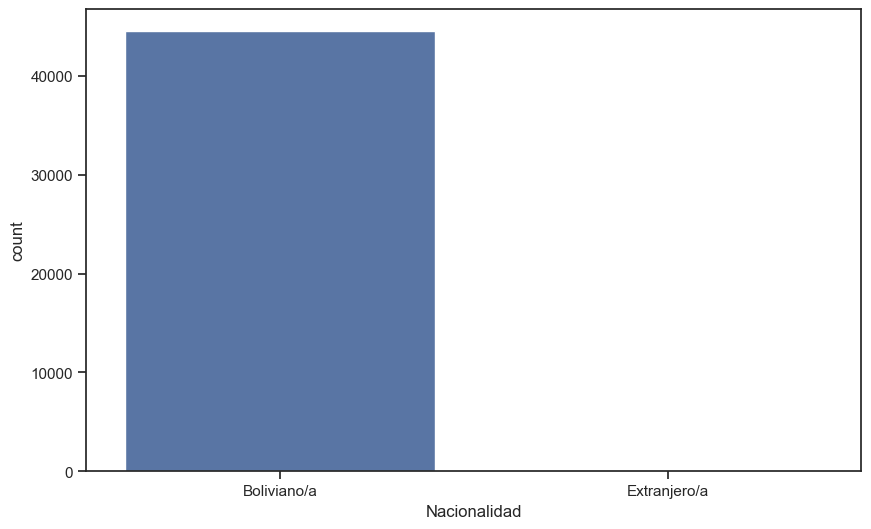

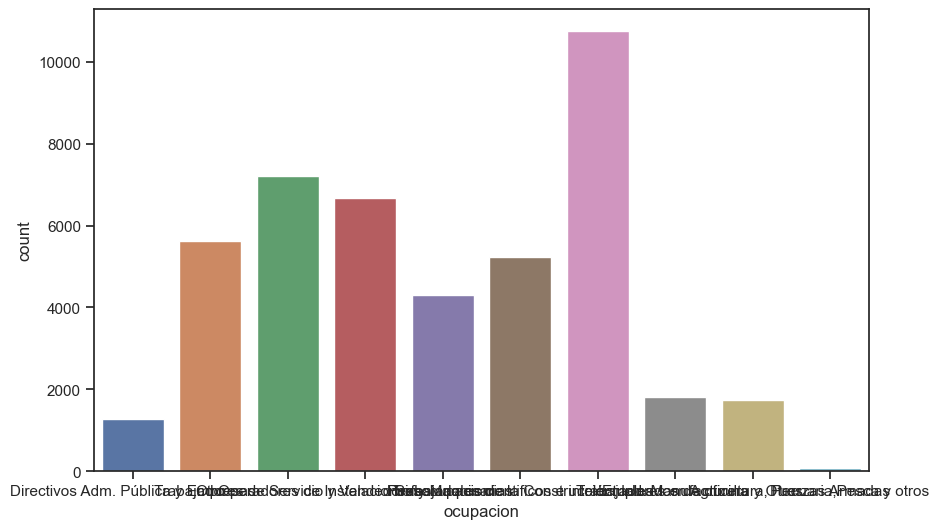

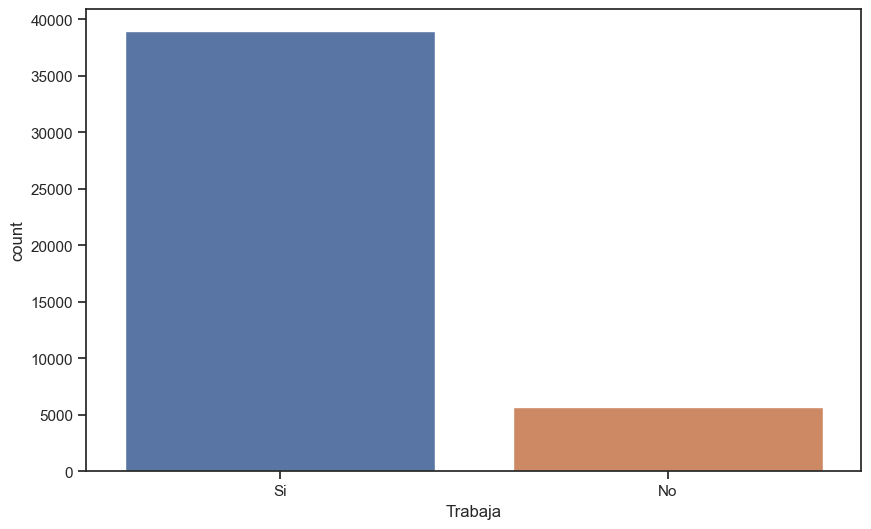

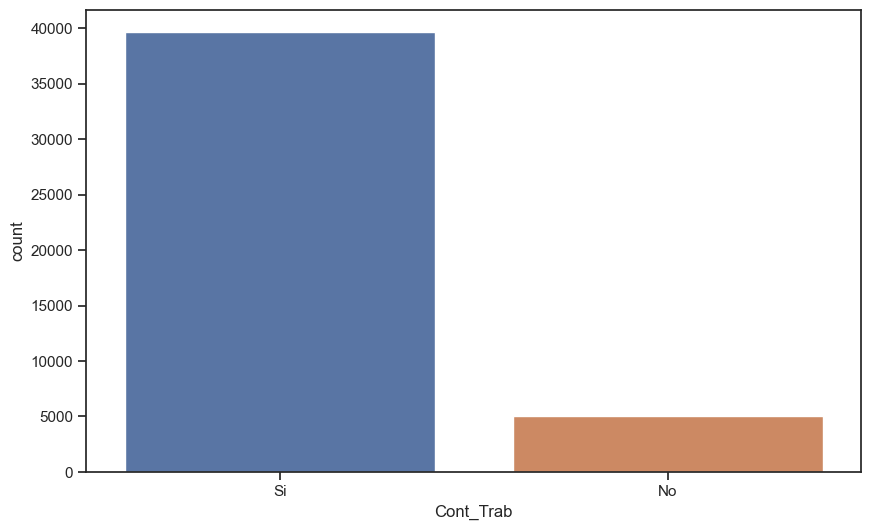

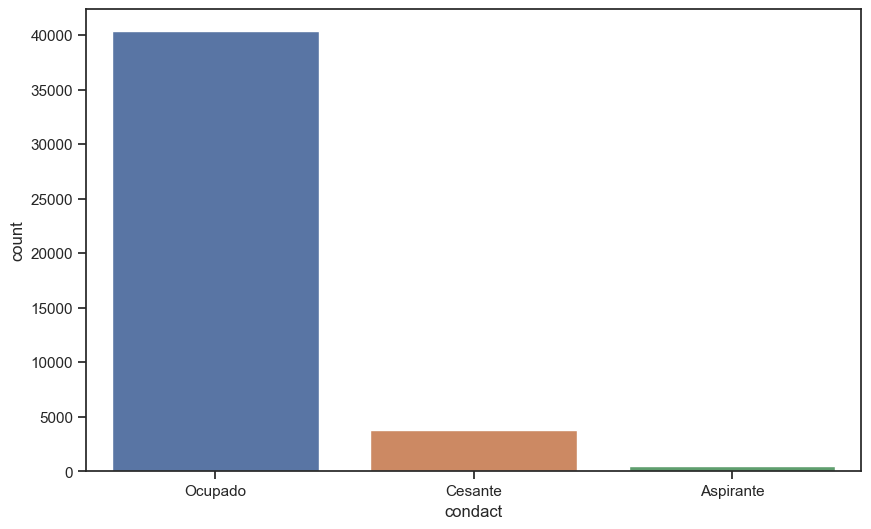

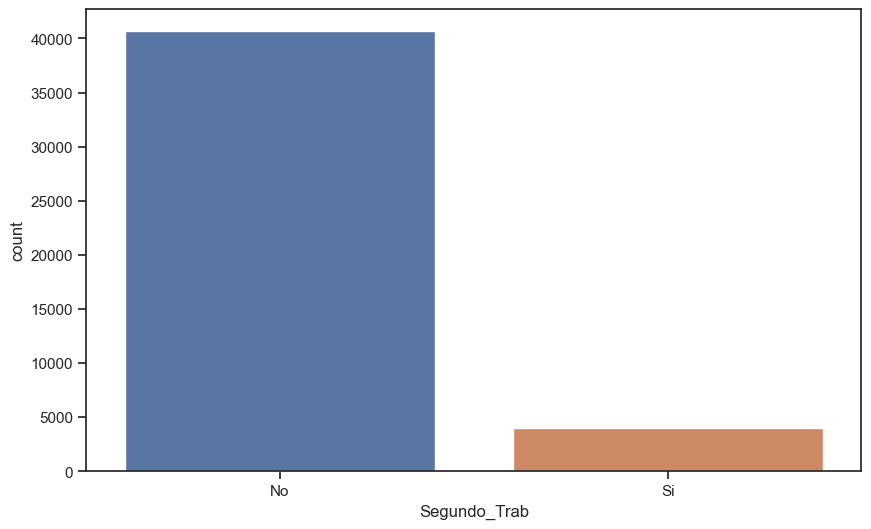

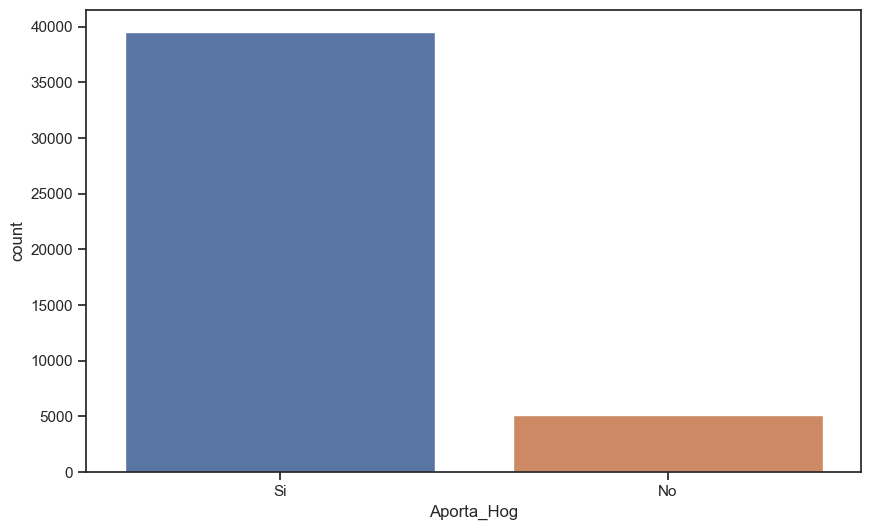

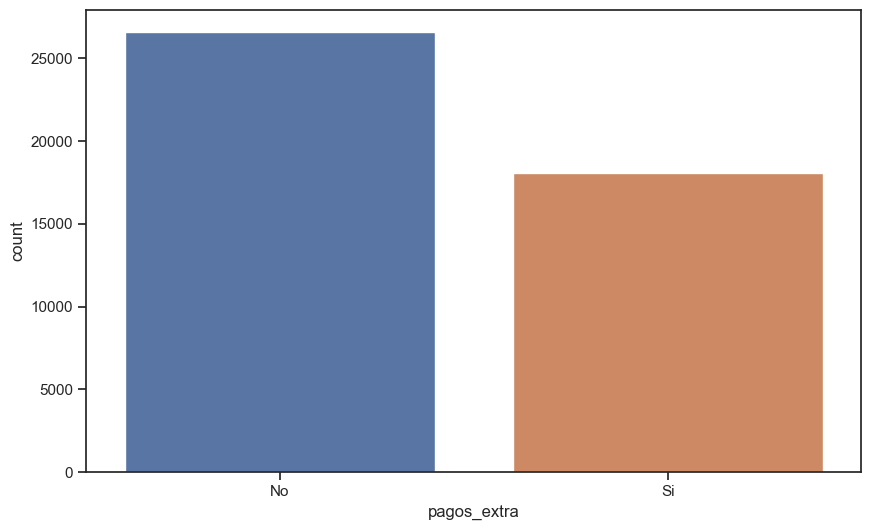

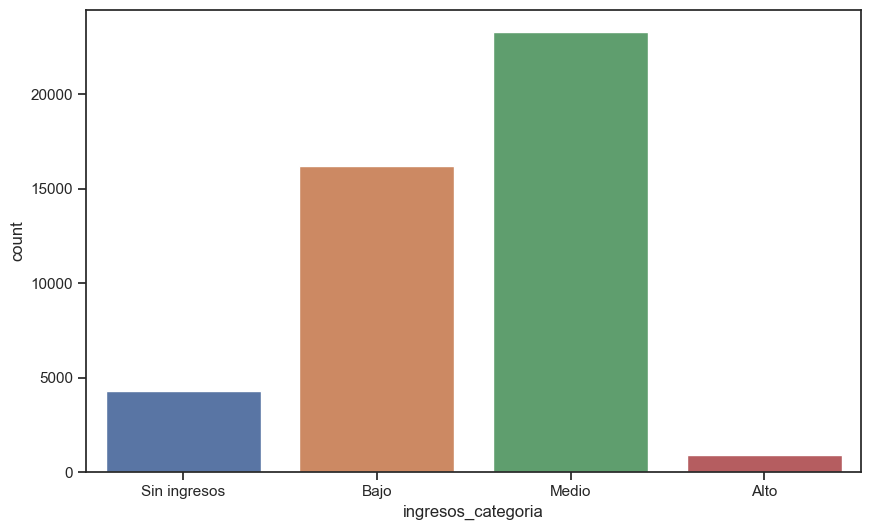

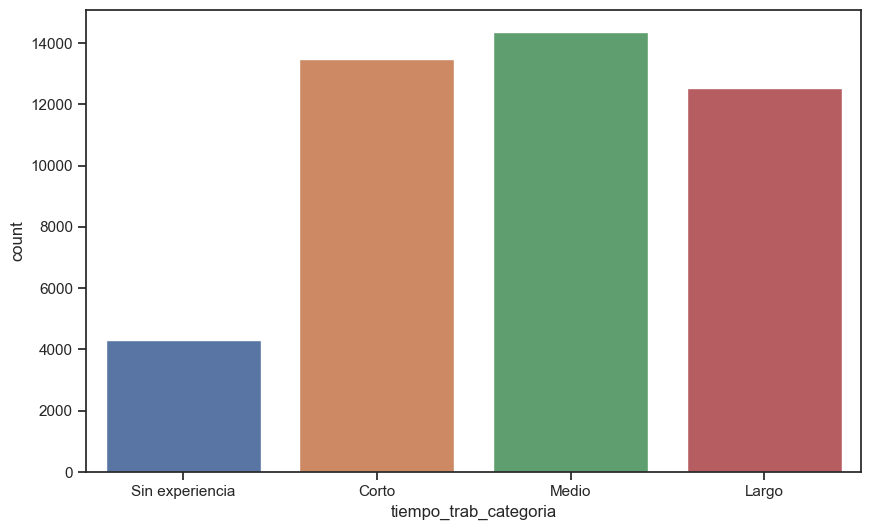

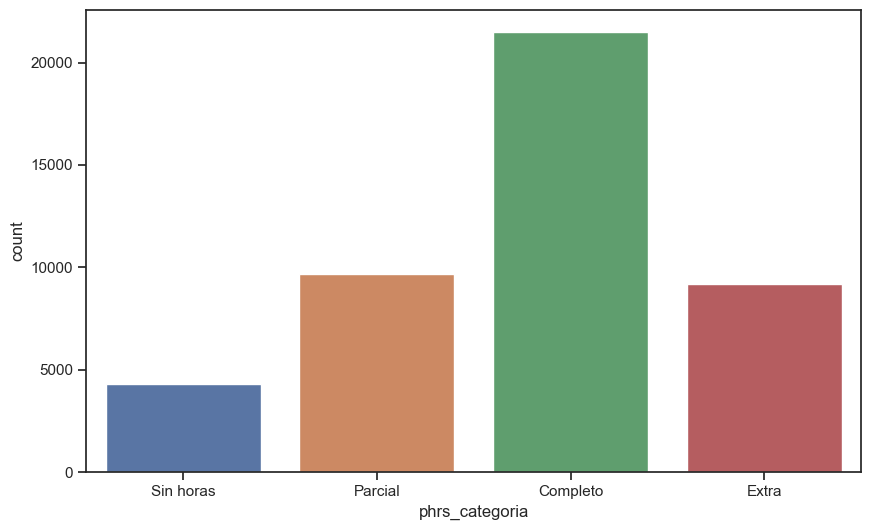

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_1.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_1)
    plt.show()



In [89]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Lista de tus variables categóricas
variables_categoricas = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Bucle para realizar el análisis para cada variable
for variable in variables_categoricas:
    # Asegúrate de que la variable sea de tipo 'category'
    df_1[variable] = pd.Categorical(df_1[variable])

    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_1[variable], df_1['tasa_desempleo'])

    # Imprimir la tabla de contingencia
    print(f"\nTabla de Contingencia para {variable}:")
    print(contingency_table)

    # Prueba de Chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi2: {chi2}, p-value: {p}")

    # Coeficiente de Contingencia (Cramér's V)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    print(f"Coeficiente de Contingencia (Cramér's V) para {variable}: {cramer_v}")

    # Análisis de tendencias (Promedio por Categoría)
    trend_analysis = df_1.groupby(variable)['tasa_desempleo'].mean()
    print(f"\nAnálisis de Tendencias para {variable}:")
    print(trend_analysis)



Tabla de Contingencia para peao:
tasa_desempleo   4.27   4.42  4.51   4.83
peao                                     
No               1033   1080  1141   1045
Si              12611  11695  4465  11591

Chi2: 854.6591346892911, p-value: 6.046036149155003e-185
Coeficiente de Contingencia (Cramér's V) para peao: 0.1380935925494963

Análisis de Tendencias para peao:
peao
No    4.507506
Si    4.500831
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para Genero:
tasa_desempleo  4.27  4.42  4.51  4.83
Genero                                
Hombre          8972  8873  3670  8226
Mujer           4672  3902  1936  4410

Chi2: 67.21449288893541, p-value: 1.684817180313702e-14
Coeficiente de Contingencia (Cramér's V) para Genero: 0.03791900581431943

Análisis de Tendencias para Genero:
Genero
Hombre    4.499256
Mujer     4.505894
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para s1_05:
tasa_desempleo           4.27  4.42  4.51  4.83
s1_05                                

In [90]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import numpy as np

# Crear tabla de contingencia para 'ingresos_categoria'
contingency_table_ingresos = pd.crosstab(df_1['ingresos_categoria'], df_1['tasa_desempleo'])
print("Tabla de Contingencia (Ingresos):")
print(contingency_table_ingresos)

# Prueba de Chi-cuadrado para 'ingresos_categoria'
chi2_ingresos, p_ingresos, _, _ = chi2_contingency(contingency_table_ingresos)
print(f"\nChi2 (Ingresos): {chi2_ingresos}, p-value: {p_ingresos}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_ingresos.sum().sum()
phi2_ingresos = chi2_ingresos / n
r, k = contingency_table_ingresos.shape
cramers_v_ingresos = np.sqrt(phi2_ingresos / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Ingresos): {cramers_v_ingresos}")

# Análisis de tendencias para 'ingresos_categoria'
trend_analysis_ingresos = df_1.groupby('ingresos_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Ingresos):")
print(trend_analysis_ingresos)

# Coeficiente de correlación de Spearman para 'ingresos_categoria'
spearman_corr_ingresos, _ = spearmanr(df_1['ingresos_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Ingresos): {spearman_corr_ingresos}")

# Repetir para 'tiempo_trab_categoria'

# Crear tabla de contingencia para 'tiempo_trab_categoria'
contingency_table_tiempo_trab = pd.crosstab(df_1['tiempo_trab_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Tiempo de Trabajo):")
print(contingency_table_tiempo_trab)

# Prueba de Chi-cuadrado para 'tiempo_trab_categoria'
chi2_tiempo_trab, p_tiempo_trab, _, _ = chi2_contingency(contingency_table_tiempo_trab)
print(f"\nChi2 (Tiempo de Trabajo): {chi2_tiempo_trab}, p-value: {p_tiempo_trab}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_tiempo_trab.sum().sum()
phi2_tiempo_trab = chi2_tiempo_trab / n
r, k = contingency_table_tiempo_trab.shape
cramers_v_tiempo_trab = np.sqrt(phi2_tiempo_trab / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Tiempo de Trabajo): {cramers_v_tiempo_trab}")

# Análisis de tendencias para 'tiempo_trab_categoria'
trend_analysis_tiempo_trab = df_1.groupby('tiempo_trab_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Tiempo de Trabajo):")
print(trend_analysis_tiempo_trab)

# Coeficiente de correlación de Spearman para 'tiempo_trab_categoria'
spearman_corr_tiempo_trab, _ = spearmanr(df_1['tiempo_trab_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Tiempo de Trabajo): {spearman_corr_tiempo_trab}")

# Repetir para 'phrs_categoria'

# Crear tabla de contingencia para 'phrs_categoria'
contingency_table_phrs = pd.crosstab(df_1['phrs_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Horas de Trabajo):")
print(contingency_table_phrs)

# Prueba de Chi-cuadrado para 'phrs_categoria'
chi2_phrs, p_phrs, _, _ = chi2_contingency(contingency_table_phrs)
print(f"\nChi2 (Horas de Trabajo): {chi2_phrs}, p-value: {p_phrs}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_phrs.sum().sum()
phi2_phrs = chi2_phrs / n
r, k = contingency_table_phrs.shape
cramers_v_phrs = np.sqrt(phi2_phrs / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Horas de Trabajo): {cramers_v_phrs}")

# Análisis de tendencias para 'phrs_categoria'
trend_analysis_phrs = df_1.groupby('phrs_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Horas de Trabajo):")
print(trend_analysis_phrs)

# Coeficiente de correlación de Spearman para 'phrs_categoria'
spearman_corr_phrs, _ = spearmanr(df_1['phrs_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Horas de Trabajo): {spearman_corr_phrs}")



Tabla de Contingencia (Ingresos):
tasa_desempleo      4.27  4.42  4.51  4.83
ingresos_categoria                        
Sin ingresos        1033  1081  1141  1045
Bajo                4923  4675  2040  4559
Medio               7430  6732  2340  6790
Alto                 258   287    85   242

Chi2 (Ingresos): 921.3000399501863, p-value: 1.5911016400670902e-192

Coeficiente de Contingencia (Cramér's V) (Ingresos): 0.0829231318270412

Análisis de Tendencias (Ingresos):
ingresos_categoria
Sin ingresos    4.507486
Bajo            4.501147
Medio           4.500714
Alto            4.498177
Name: tasa_desempleo, dtype: float64

Coeficiente de Correlación de Spearman (Ingresos): -0.02872602641014755

Tabla de Contingencia (Tiempo de Trabajo):
tasa_desempleo         4.27  4.42  4.51  4.83
tiempo_trab_categoria                        
Sin experiencia        1033  1081  1141  1045
Corto                  4994  3572   703  4201
Medio                  4290  4661  1393  4017
Largo                  332

In [91]:
from scipy.stats import chi2_contingency

# Crear una copia del DataFrame original
df_copy = df_1.copy()

categorical_variables = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(df_copy[var1], df_copy[var2])

            # Realizar la prueba de chi-cuadrado
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Imprimir resultados
            print(f"Prueba de chi-cuadrado para '{var1}' vs '{var2}': Estadística = {chi2}, Valor p = {p}")

            # Puedes agregar aquí la lógica para usar el valor p y tomar decisiones

Prueba de chi-cuadrado para 'peao' vs 'Genero': Estadística = 469.9380822537698, Valor p = 3.3055404408484803e-104
Prueba de chi-cuadrado para 'peao' vs 's1_05': Estadística = 2067.9924854991923, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Niv_Ed': Estadística = 102.66982806909294, Valor p = 6.954111892738697e-20
Prueba de chi-cuadrado para 'peao' vs 'Est_Civ': Estadística = 1590.394186224587, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Nacionalidad': Estadística = 0.06901104885431202, Valor p = 0.7927821705741747
Prueba de chi-cuadrado para 'peao' vs 'ocupacion': Estadística = 44592.102384951555, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Trabaja': Estadística = 32466.750545256284, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Cont_Trab': Estadística = 37646.40280640875, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'condact': Estadística = 44661.0, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Segundo_Trab': Estadística = 463.9168008855

Prueba de chi-cuadrado para 'Cont_Trab' vs 'condact': Estadística = 37656.26797995213, Valor p = 0.0
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Segundo_Trab': Estadística = 354.5063766982471, Valor p = 4.424150468145368e-79
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Aporta_Hog': Estadística = 31240.917950258714, Valor p = 0.0
Prueba de chi-cuadrado para 'Cont_Trab' vs 'pagos_extra': Estadística = 2798.4155952762294, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'peao': Estadística = 44661.0, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Genero': Estadística = 504.01350320195695, Valor p = 3.588049099137945e-110
Prueba de chi-cuadrado para 'condact' vs 's1_05': Estadística = 2490.021949144789, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Niv_Ed': Estadística = 139.01972052593786, Valor p = 9.445337214139096e-24
Prueba de chi-cuadrado para 'condact' vs 'Est_Civ': Estadística = 1798.9895832421153, Valor p = 0.0
Prueba de chi-cuadrado para 'condact' vs 'Naci

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# ANOVA para una variable categórica (ejemplo: nivel educativo)
anova_model = ols('tasa_desempleo ~ C(Niv_Ed)', data=df_1).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable para cada categoría de la variable categórica
categories = df['Niv_Ed'].unique()

for category in categories:
    category_df = df[df['Niv_Ed'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
                sum_sq       df          F        PR(>F)
C(Niv_Ed)     3.929658      6.0  13.439425  2.727630e-15
Residual   2176.121938  44654.0        NaN           NaN

Regression Results for Secundaria incompleta:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:42:26   Log-Likelihood:                 898.08
No. Observations:               13181   AIC:                            -1794.
Df Residuals:                   13180   BIC:                            -1787.
Df Model:                           0                                         
Covariance Type:            nonrobust                   

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [93]:
# ANOVA
anova_model = ols('tasa_desempleo ~ C(depto)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable
categories = df['depto'].unique()

for category in categories:
    category_df = df[df['depto'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
               sum_sq       df         F        PR(>F)
C(depto)     2.385127      8.0  6.063728  7.951074e-08
Residual  3010.797836  61235.0       NaN           NaN

Regression Results for Santa Cruz:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:42:26   Log-Likelihood:                 960.00
No. Observations:               11622   AIC:                            -1918.
Df Residuals:                   11621   BIC:                            -1911.
Df Model:                           0                                         
Covariance Type:            nonrobust                                    

In [94]:
from scipy.stats import levene
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'Est_Civ'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors = []

# Filtrar los datos para cada categoría de 'Est_Civ' y almacenar los vectores
categorias_est_civ = df_1['Est_Civ'].unique()

for categoria in categorias_est_civ:
    subset_data = df_1[df_1['Est_Civ'] == categoria]['tasa_desempleo']
    data_vectors.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat, p_value = levene(*data_vectors)

# Mostrar los resultados
print(f"Prueba de Levene para todos los datos: Estadística = {stat}, Valor p = {p_value}")



Prueba de Levene para todos los datos: Estadística = 6.315652672160329, Valor p = 0.0002808989648994178


In [95]:
from scipy.stats import f_oneway

# Suponiendo que 'tasa_desempleo' es tu variable dependiente y 'Est_Civ' es la variable categórica
grupo_categorias = [df_1['tasa_desempleo'][df_1['Est_Civ'] == categoria] for categoria in categorias_est_civ]

# Aplicar ANOVA
stat, p_value = f_oneway(*grupo_categorias)

# Mostrar resultados
print(f"ANOVA: Estadística F = {stat}, Valor p = {p_value}")


ANOVA: Estadística F = 6.020129142533373, Valor p = 0.00042811483173804785


In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar prueba de Tukey
tukey_results = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Est_Civ'])

# Mostrar resultados
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  CASADO/A SEPARADO/A  -0.0138  0.014 -0.0257  -0.002   True
  CASADO/A  SOLTERO/A   0.0026 0.7083 -0.0036  0.0088  False
  CASADO/A    VIUDO/A  -0.0203 0.0481 -0.0405 -0.0001   True
SEPARADO/A  SOLTERO/A   0.0164 0.0042  0.0039  0.0289   True
SEPARADO/A    VIUDO/A  -0.0065 0.8876 -0.0294  0.0165  False
 SOLTERO/A    VIUDO/A  -0.0229 0.0224 -0.0435 -0.0023   True
------------------------------------------------------------


In [97]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'depto'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_depto = []

# Filtrar los datos para cada categoría de 'depto' y almacenar los vectores
categorias_depto = df_1['depto'].unique()

for categoria in categorias_depto:
    subset_data = df_1[df_1['depto'] == categoria]['tasa_desempleo']
    data_vectors_depto.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_depto, p_value_depto = levene(*data_vectors_depto)

# Mostrar los resultados
print(f"Prueba de Levene para 'depto': Estadística = {stat_depto}, Valor p = {p_value_depto}")

# Aplicar ANOVA
grupo_categorias_depto = [df_1['tasa_desempleo'][df_1['depto'] == categoria] for categoria in categorias_depto]
stat_depto_anova, p_value_depto_anova = f_oneway(*grupo_categorias_depto)

# Mostrar resultados ANOVA
print(f"ANOVA para 'depto': Estadística F = {stat_depto_anova}, Valor p = {p_value_depto_anova}")

# Realizar prueba de Tukey
tukey_results_depto = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['depto'])

# Mostrar resultados Tukey
print(tukey_results_depto)



Prueba de Levene para 'depto': Estadística = 10.874937244814586, Valor p = 1.958156175002175e-15
ANOVA para 'depto': Estadística F = 4.24959748311703, Valor p = 4.086239672788341e-05
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
      Beni Chuquisaca   0.0038 0.9992 -0.0138 0.0213  False
      Beni Cochabamba   0.0158 0.0227  0.0012 0.0305   True
      Beni     La Paz   0.0192 0.0009   0.005 0.0333   True
      Beni      Oruro   0.0075 0.9476 -0.0113 0.0264  False
      Beni      Pando   0.0179 0.0442  0.0002 0.0356   True
      Beni     Potosi   0.0193 0.0088  0.0028 0.0358   True
      Beni Santa Cruz   0.0191 0.0012  0.0047 0.0335   True
      Beni     Tarija    0.019 0.0403  0.0004 0.0376   True
Chuquisaca Cochabamba   0.0121 0.2042 -0.0026 0.0267  False
Chuquisaca     La Paz   0.0154 0.0208  0.0013 0.0296   True
Chuquisaca      Oruro   0.0038 0.9995

In [98]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'ocupacion'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_ocupacion = []

# Filtrar los datos para cada categoría de 'ocupacion' y almacenar los vectores
categorias_ocupacion = df_1['ocupacion'].unique()

for categoria in categorias_ocupacion:
    subset_data = df_1[df_1['ocupacion'] == categoria]['tasa_desempleo']
    data_vectors_ocupacion.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_ocupacion, p_value_ocupacion = levene(*data_vectors_ocupacion)

# Mostrar los resultados
print(f"Prueba de Levene para 'ocupacion': Estadística = {stat_ocupacion}, Valor p = {p_value_ocupacion}")

# Aplicar ANOVA
grupo_categorias_ocupacion = [df_1['tasa_desempleo'][df_1['ocupacion'] == categoria] for categoria in categorias_ocupacion]
stat_ocupacion_anova, p_value_ocupacion_anova = f_oneway(*grupo_categorias_ocupacion)

# Mostrar resultados ANOVA
print(f"ANOVA para 'ocupacion': Estadística F = {stat_ocupacion_anova}, Valor p = {p_value_ocupacion_anova}")

# Realizar prueba de Tukey
tukey_results_ocupacion = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['ocupacion'])

# Mostrar resultados Tukey
print(tukey_results_ocupacion)


Prueba de Levene para 'ocupacion': Estadística = 13.052597492363889, Valor p = 4.7030174135248626e-21
ANOVA para 'ocupacion': Estadística F = 3.7504605630592938, Valor p = 9.903420356732814e-05
                                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                      
                           group1                                                      group2                           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------------------------------
                         Directivos Adm. Pública y Empresas                                        Empleados de oficina   0.0113 0.9265 -0.0142  0.0369  False
                         Directivos Adm. Pública y Empresas                                             Fuerzas Armadas  -0.0218 0.9986 -0.1082  0.0646  False
           

In [99]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'condact'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_condact = []

# Filtrar los datos para cada categoría de 'condact' y almacenar los vectores
categorias_condact = df_1['condact'].unique()

for categoria in categorias_condact:
    subset_data = df_1[df_1['condact'] == categoria]['tasa_desempleo']
    data_vectors_condact.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_condact, p_value_condact = levene(*data_vectors_condact)

# Mostrar los resultados
print(f"Prueba de Levene para 'condact': Estadística = {stat_condact}, Valor p = {p_value_condact}")

# Aplicar ANOVA
grupo_categorias_condact = [df_1['tasa_desempleo'][df_1['condact'] == categoria] for categoria in categorias_condact]
stat_condact_anova, p_value_condact_anova = f_oneway(*grupo_categorias_condact)

# Mostrar resultados ANOVA
print(f"ANOVA para 'condact': Estadística F = {stat_condact_anova}, Valor p = {p_value_condact_anova}")

# Realizar prueba de Tukey
tukey_results_condact = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['condact'])

# Mostrar resultados Tukey
print(tukey_results_condact)


Prueba de Levene para 'condact': Estadística = 59.076907522516784, Valor p = 2.382900940563914e-26
ANOVA para 'condact': Estadística F = 7.977649692487783, Valor p = 0.0003435338473780175
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Aspirante Cesante    0.038 0.0012  0.0127  0.0633   True
Aspirante Ocupado   0.0272 0.0218  0.0032  0.0512   True
  Cesante Ocupado  -0.0108 0.0104 -0.0196 -0.0021   True
--------------------------------------------------------


In [100]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_s1_05 = []

# Filtrar los datos para cada categoría de 's1_05' y almacenar los vectores
categorias_s1_05 = df_1['s1_05'].unique()

for categoria in categorias_s1_05:
    subset_data = df_1[df_1['s1_05'] == categoria]['tasa_desempleo']
    data_vectors_s1_05.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_s1_05, p_value_s1_05 = levene(*data_vectors_s1_05)

# Mostrar los resultados
print(f"Prueba de Levene para 's1_05': Estadística = {stat_s1_05}, Valor p = {p_value_s1_05}")

# Aplicar ANOVA
grupo_categorias_s1_05 = [df_1['tasa_desempleo'][df_1['s1_05'] == categoria] for categoria in categorias_s1_05]
stat_s1_05_anova, p_value_s1_05_anova = f_oneway(*grupo_categorias_s1_05)

# Mostrar resultados ANOVA
print(f"ANOVA para 's1_05': Estadística F = {stat_s1_05_anova}, Valor p = {p_value_s1_05_anova}")

# Realizar prueba de Tukey
tukey_results_s1_05 = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['s1_05'])

# Mostrar resultados Tukey
print(tukey_results_s1_05)



Prueba de Levene para 's1_05': Estadística = 43.10853566064583, Valor p = 2.1374972797185897e-69
ANOVA para 's1_05': Estadística F = 12.432022925400114, Valor p = 5.79033867753746e-18
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
 ESPOSA/O O CONVIVIENTE    HERMANO/A O CUÑADO/A  -0.0288  0.088 -0.0596   0.002  False
 ESPOSA/O O CONVIVIENTE     HIJO/A O ENTENADO/A   -0.019    0.0 -0.0296 -0.0084   True
 ESPOSA/O O CONVIVIENTE   JEFE O JEFA DEL HOGAR  -0.0027 0.9896 -0.0113   0.006  False
 ESPOSA/O O CONVIVIENTE             NIETO/NIETA   -0.037 0.2784 -0.0846  0.0106  False
 ESPOSA/O O CONVIVIENTE           OTRO PARIENTE  -0.0011    1.0 -0.0531  0.0509  False
 ESPOSA/O O CONVIVIENTE OTRO QUE NO ES PARIENTE  -0.0595 0.8105 -0.1754  0.0565  False
 ESPOSA/O O CONVIVIENTE          

In [101]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_genero = []

# Filtrar los datos para cada categoría de 'Genero' y almacenar los vectores
categorias_genero = df_1['Genero'].unique()

for categoria in categorias_genero:
    subset_data = df_1[df_1['Genero'] == categoria]['tasa_desempleo']
    data_vectors_genero.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_genero, p_value_genero = levene(*data_vectors_genero)

# Mostrar los resultados
print(f"Prueba de Levene para 'Genero': Estadística = {stat_genero}, Valor p = {p_value_genero}")

# Aplicar ANOVA
grupo_categorias_genero = [df_1['tasa_desempleo'][df_1['Genero'] == categoria] for categoria in categorias_genero]
stat_genero_anova, p_value_genero_anova = f_oneway(*grupo_categorias_genero)

# Mostrar resultados ANOVA
print(f"ANOVA para 'Genero': Estadística F = {stat_genero_anova}, Valor p = {p_value_genero_anova}")

# Realizar prueba de Tukey
tukey_results_genero = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Genero'])

# Mostrar resultados Tukey
print(tukey_results_genero)



Prueba de Levene para 'Genero': Estadística = 39.63545726284687, Valor p = 3.089129773293813e-10
ANOVA para 'Genero': Estadística F = 8.969765296782487, Valor p = 0.002746342897746491
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
Hombre  Mujer   0.0066 0.0027 0.0023 0.011   True
-------------------------------------------------


In [102]:
# Muestra los tipos de datos de cada columna
print(df_1.dtypes)


gestion                     int64
trimestre                   int64
id_persona                  int64
depto                      object
peao                     category
Genero                   category
Edad                        int64
s1_05                    category
Niv_Ed                   category
Est_Civ                  category
Nacionalidad             category
ocupacion                category
Trabaja                  category
Cont_Trab                category
condact                  category
phrs                      float64
Segundo_Trab             category
Aporta_Hog               category
tiempo_trab_meses         float64
ingresos                  float64
pagos_extra              category
tasa_desempleo            float64
ingresos_categoria       category
tiempo_trab_categoria    category
phrs_categoria           category
dtype: object


In [103]:
df_cleaned=df_1.copy()

# Columnas numéricas con valores nulos
columnas_numericas = ['phrs', 'tiempo_trab_meses', 'ingresos']

# Convierte las columnas a tipo numérico
df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Muestra información sobre los valores nulos y los tipos de datos después de la conversión
print(df_cleaned.info())

# Llena los valores nulos con una estrategia específica (por ejemplo, usando la media)
df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 44661 entries, 2 to 113437
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                44661 non-null  int64   
 1   trimestre              44661 non-null  int64   
 2   id_persona             44661 non-null  int64   
 3   depto                  44661 non-null  object  
 4   peao                   44661 non-null  category
 5   Genero                 44661 non-null  category
 6   Edad                   44661 non-null  int64   
 7   s1_05                  44661 non-null  category
 8   Niv_Ed                 44661 non-null  category
 9   Est_Civ                44661 non-null  category
 10  Nacionalidad           44661 non-null  category
 11  ocupacion              44661 non-null  category
 12  Trabaja                44661 non-null  category
 13  Cont_Trab              44661 non-null  category
 14  condact                44661 non-null  cat

C:\Users\win10\AppData\Local\Temp\ipykernel_8976\757142728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


In [104]:
# Elimina las filas con valores nulos
df_cleaned.dropna(inplace=True)

# Verifica el nuevo estado del DataFrame
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 40361 entries, 2 to 113437
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                40361 non-null  int64   
 1   trimestre              40361 non-null  int64   
 2   id_persona             40361 non-null  int64   
 3   depto                  40361 non-null  object  
 4   peao                   40361 non-null  category
 5   Genero                 40361 non-null  category
 6   Edad                   40361 non-null  int64   
 7   s1_05                  40361 non-null  category
 8   Niv_Ed                 40361 non-null  category
 9   Est_Civ                40361 non-null  category
 10  Nacionalidad           40361 non-null  category
 11  ocupacion              40361 non-null  category
 12  Trabaja                40361 non-null  category
 13  Cont_Trab              40361 non-null  category
 14  condact                40361 non-null  cat

In [105]:
# Convertir todos los valores de la columna 'phrs' a cadenas
df_cleaned['phrs'] = df_cleaned['phrs'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'phrs'
df_cleaned['phrs'] = df_cleaned['phrs'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'phrs'
print("Valores únicos en la columna 'phrs':")
print(df_cleaned['phrs'].unique())

# Verificar la cantidad de valores nulos en la columna 'phrs'
print("Cantidad de valores nulos en la columna 'phrs':")
print(df_cleaned['phrs'].isnull().sum())

# Convertir todos los valores de la columna 'ingresos' a cadenas
df_cleaned['ingresos'] = df_cleaned['ingresos'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'ingresos'
df_cleaned['ingresos'] = df_cleaned['ingresos'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'ingresos'
print("Valores únicos en la columna 'ingresos':")
print(df_cleaned['ingresos'].unique())

# Verificar la cantidad de valores nulos en la columna 'ingresos'
print("Cantidad de valores nulos en la columna 'ingresos':")
print(df_cleaned['ingresos'].isnull().sum())

# Convertir todos los valores de la columna 'tiempo_trab_meses' a cadenas
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'tiempo_trab_meses'
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'tiempo_trab_meses'
print("Valores únicos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].unique())

# Verificar la cantidad de valores nulos en la columna 'tiempo_trab_meses'
print("Cantidad de valores nulos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].isnull().sum())


Valores únicos en la columna 'phrs':
['48.0' '16.0' '42.0' '60.0' '52.0' '56.0' '55.0' '12.0' '44.0' '28.0'
 '54.0' '72.0' '18.0' '70.0' '8.0' '30.0' '49.0' '24.0' '40.0' '35.0'
 '9.0' '20.0' '36.0' '15.0' '45.0' '63.0' '50.0' '10.0' '6.0' '25.0'
 '49.5' '14.0' '66.0' '32.0' '42.5' '27.5' '32.5' '27.0' '58.5' '22.5'
 '4.0' '38.5' '39.0' '51.0' '75.0' '5.0' '64.0' '60.5' '33.0' '71.5'
 '21.0' '65.0' '26.0' '17.5' '46.75' '22.0' '47.5' '3.5' '3.0' '24.5'
 '13.0' '13.5' '37.5' '57.0' '7.0' '26.25' '12.5' '24.75' '43.75' '11.0'
 '23.75' '68.0' '4.5' '31.5' '34.0' '30.25' '52.25' '28.75' '18.75' '45.5'
 '69.0' '73.5' '48.75' '66.5' '41.25' '7.5' '55.25' '59.5' '52.5' '38.0'
 '16.5' '35.75' '33.75']
Cantidad de valores nulos en la columna 'phrs':
0
Valores únicos en la columna 'ingresos':
['4000.0' '3000.0' '4500.0' ... '2663.333333333333' '5713.0'
 '2491.6666666666665']
Cantidad de valores nulos en la columna 'ingresos':
0
Valores únicos en la columna 'tiempo_trab_meses':
['192.016' '8.02' 

In [106]:
df_1['Edad'] = df_1['Edad'].astype('float64')

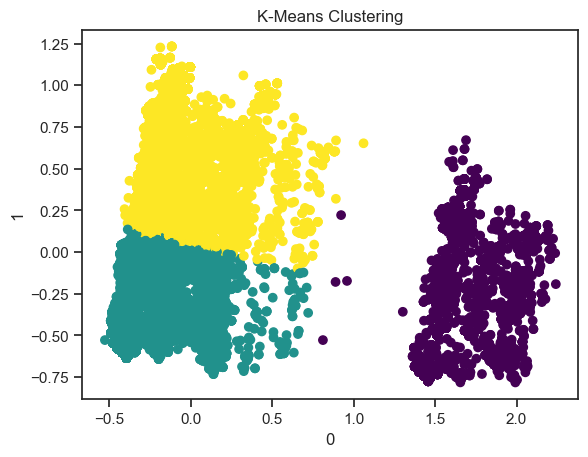

          0         1  Edad  tiempo_trab_meses  ingresos  phrs
0 -0.357961 -0.239099  46.0            192.016    4000.0  48.0
1 -0.215660  0.650696  42.0              8.020    3000.0  16.0
2 -0.234640  0.752602  43.0              8.080    4500.0  42.0
3  0.197789 -0.570050  58.0             36.030    3000.0  60.0
4  0.436086 -0.476052  29.0             72.060    3600.0  48.0


In [107]:
import pandas as pd
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# DataFrame original
df_original = df_1.copy()

# Variables categóricas
categorical_vars = ['depto', 'Genero', 'Niv_Ed','s1_05', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact']

# Lidiar con valores faltantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
df_original[categorical_vars] = imputer.fit_transform(df_original[categorical_vars])

# Lidiar con valores infinitos (inf)
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Realizar el Análisis de Correspondencia Múltiple (MCA) para las variables categóricas
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_original[categorical_vars])

# Combinar las variables MCA con las numéricas
combined_data = pd.concat([mca_results, df_original[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]], axis=1)

# Convertir todos los nombres de columnas a cadenas
combined_data.columns = combined_data.columns.astype(str)

# Imputar valores NaN con la media para todas las columnas numéricas
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(combined_data)

# Crear un DataFrame con los valores imputados
combined_data_imputed = pd.DataFrame(imputed_values, columns=combined_data.columns)

# Aplicar K-Means Clustering solo en las variables MCA
kmeans = KMeans(n_clusters=3)
# Utilizar los nombres de las columnas del MCA resultante
cluster_columns = mca_results.columns.astype(str)
combined_data_imputed['cluster'] = kmeans.fit_predict(combined_data_imputed[cluster_columns])

# Visualizar los resultados
plt.scatter(combined_data_imputed[cluster_columns[0]], combined_data_imputed[cluster_columns[1]], c=combined_data_imputed['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(cluster_columns[0])
plt.ylabel(cluster_columns[1])
plt.show()

# Ajustar los índices antes de asignar la columna 'cluster'
combined_data = combined_data.reset_index(drop=True)

# Asegurarse de que 'cluster' esté presente en 'combined_data_imputed' antes de la asignación
if 'cluster' in combined_data_imputed.columns:
    # Asegurarse de que 'cluster' esté presente en 'combined_data' antes de la asignación
    if 'cluster' in combined_data.columns:
        combined_data['cluster'] = combined_data_imputed['cluster']

# Mostrar el DataFrame con la información del clúster
print(combined_data.head())



Composición de Clústeres para depto:
cluster      0.0   1.0   2.0  Total
depto                              
Beni         127   599   472   1198
Chuquisaca   120   650   444   1214
Cochabamba   305  1403  1075   2783
La Paz       337  1733  1292   3362
Oruro         75   398   337    810
Pando        100   484   409    993
Potosi       131   739   550   1420
Santa Cruz   300  1645  1268   3213
Tarija        65   482   338    885
Total       1560  8133  6185  15878



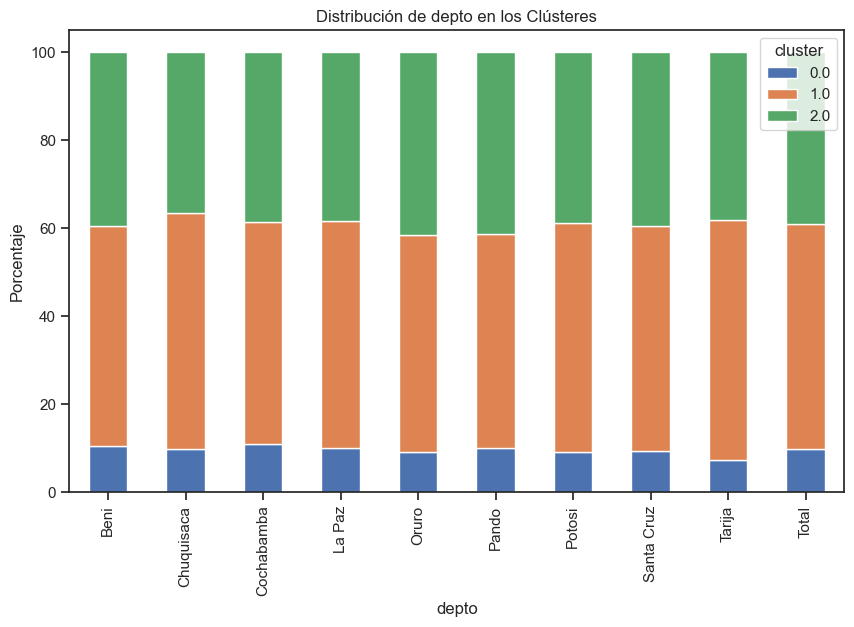


Composición de Clústeres para Genero:
cluster   0.0   1.0   2.0  Total
Genero                          
Hombre   1075  5605  4269  10949
Mujer     485  2528  1916   4929
Total    1560  8133  6185  15878



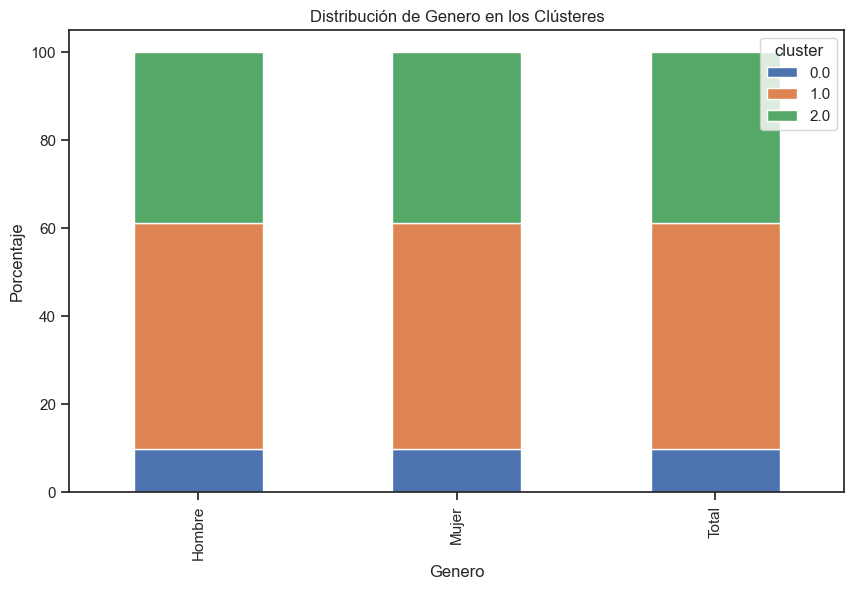


Composición de Clústeres para Niv_Ed:
cluster                 0.0   1.0   2.0  Total
Niv_Ed                                        
Ninguno                  12    59    53    124
Primaria completa       104   550   424   1078
Primaria incompleta     244  1270   956   2470
Secundaria completa     339  1665  1267   3271
Secundaria incompleta   256  1417  1055   2728
Superior                605  3172  2430   6207
Total                  1560  8133  6185  15878



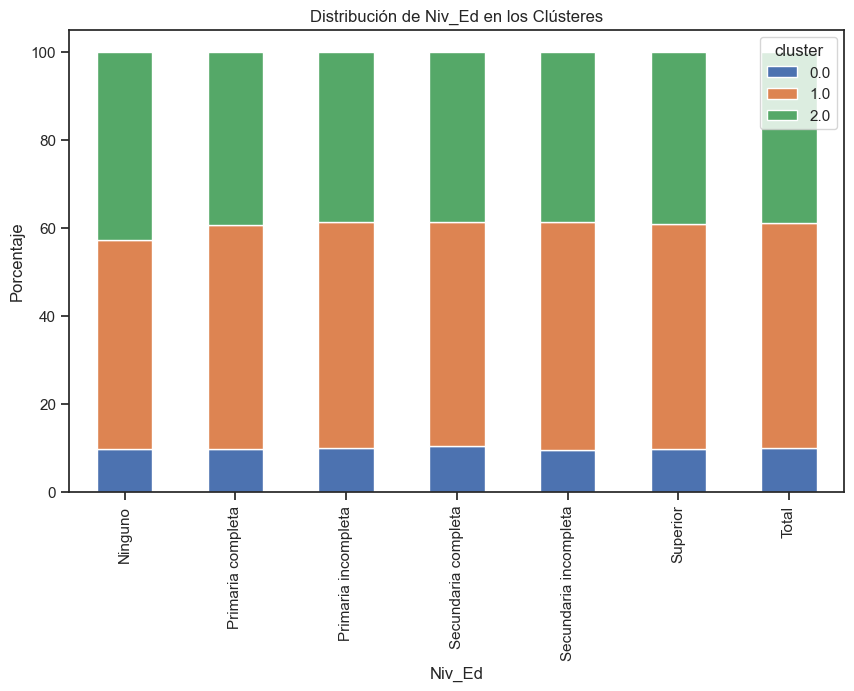


Composición de Clústeres para s1_05:
cluster                   0.0   1.0   2.0  Total
s1_05                                           
ESPOSA/O O CONVIVIENTE    277  1398  1040   2715
HERMANO/A O CUÑADO/A       25   122    76    223
HIJO/A O ENTENADO/A       294  1644  1340   3278
JEFE O JEFA DEL HOGAR     907  4738  3508   9153
NIETO/NIETA                 5    46    38     89
OTRO PARIENTE               9    31    42     82
OTRO QUE NO ES PARIENTE     3     5    11     19
PADRES/SUEGROS              3    17    17     37
YERNO O NUERA              37   132   113    282
Total                    1560  8133  6185  15878



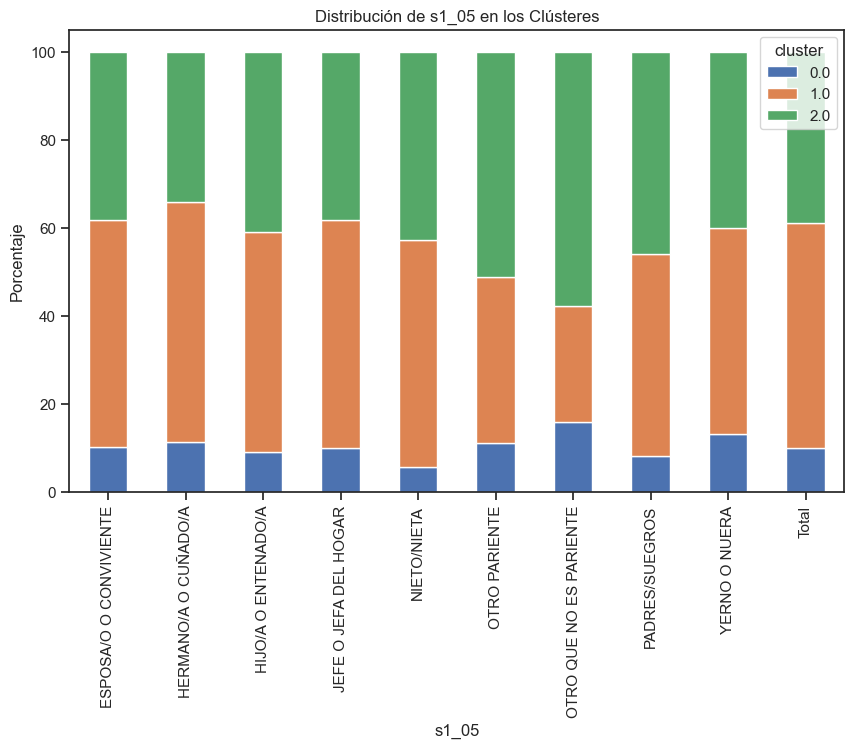


Composición de Clústeres para Est_Civ:
cluster      0.0   1.0   2.0  Total
Est_Civ                            
CASADO/A    1042  5404  4036  10482
SEPARADO/A    92   498   372    962
SOLTERO/A    384  2101  1671   4156
VIUDO/A       42   130   106    278
Total       1560  8133  6185  15878



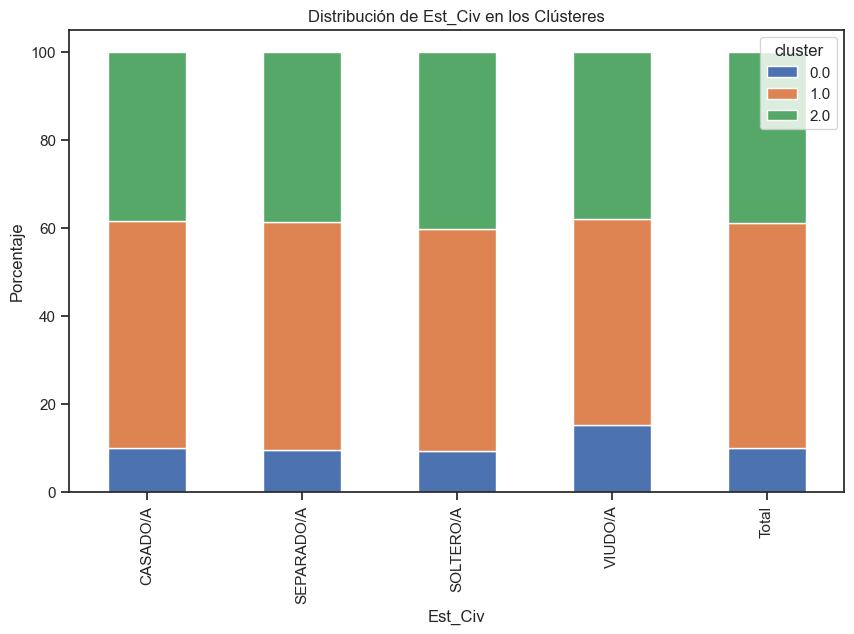


Composición de Clústeres para ocupacion:
cluster                                              0.0   1.0   2.0  Total
ocupacion                                                                  
Directivos Adm. Pública y Empresas                    47   223   181    451
Empleados de oficina                                  65   303   237    605
Fuerzas Armadas                                        4    12    11     27
Operadores de Instalaciones y Maquinarias            223  1282   878   2383
Otro                                                 171   932   728   1831
Profesionales cientificos e intelectuales            201   991   765   1957
Sin ocupacion                                        159   859   685   1703
Trabajadores de Servicio y Vendedores                223  1196   916   2335
Trabajadores de la Construcción, Ind. Manufactu...   410  2059  1545   4014
Trabajadores en Agricultura, Pecuaria,Pesca y o...    57   276   239    572
Total                                         

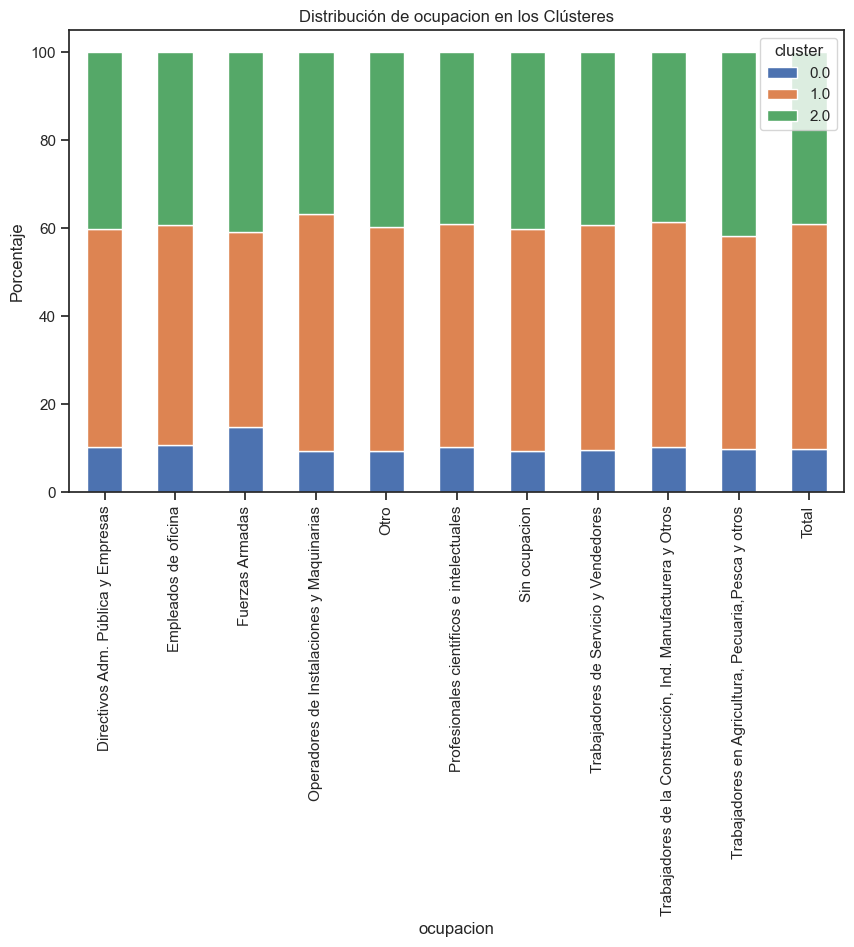


Composición de Clústeres para Trabaja:
cluster   0.0   1.0   2.0  Total
Trabaja                         
No        197  1035   826   2058
Si       1363  7098  5359  13820
Total    1560  8133  6185  15878



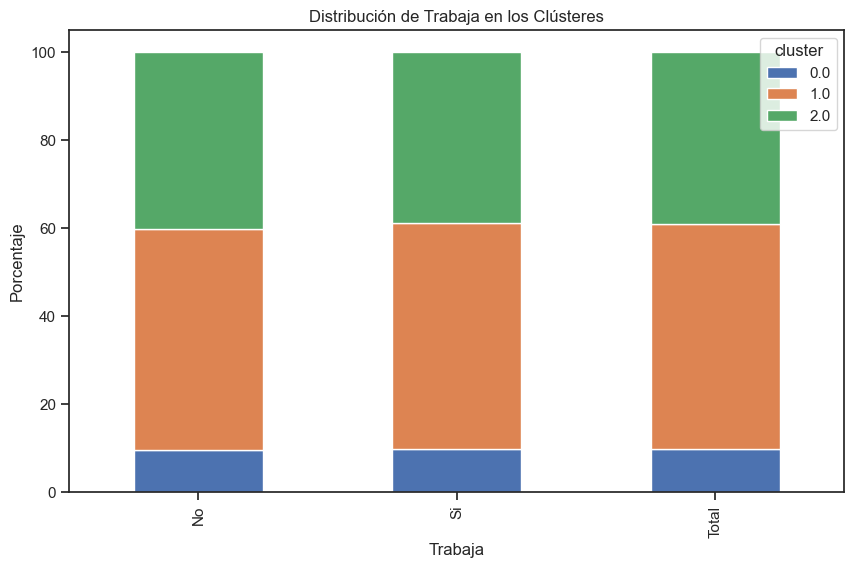


Composición de Clústeres para condact:
cluster     0.0   1.0   2.0  Total
condact                           
Aspirante    27   125   111    263
Cesante     132   735   575   1442
Ocupado    1401  7273  5499  14173
Total      1560  8133  6185  15878



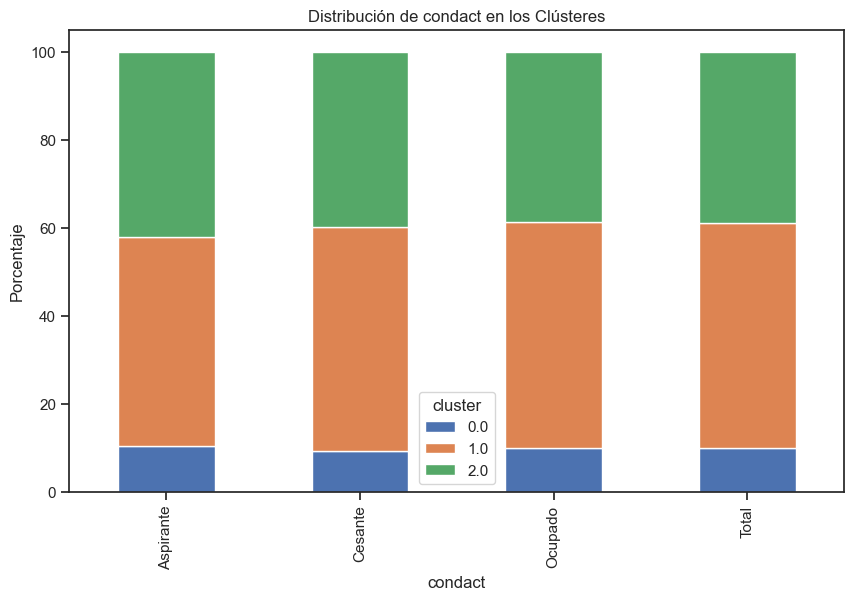

In [108]:
# Crear un DataFrame con las variables categóricas y la información del clúster
cluster_info = pd.concat([df_original[categorical_vars], combined_data_imputed['cluster']], axis=1)

# Analizar la composición de clústeres con respecto a variables categóricas
for var in categorical_vars:
    cross_tab = pd.crosstab(cluster_info[var], cluster_info['cluster'], margins=True, margins_name='Total')
    print(f"\nComposición de Clústeres para {var}:\n{cross_tab}\n")

    # Graficar barras apiladas
    cross_tab_percentage = cross_tab.div(cross_tab['Total'], axis=0) * 100
    cross_tab_percentage.drop('Total', axis=1, inplace=True)
    cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribución de {var} en los Clústeres')
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.show()


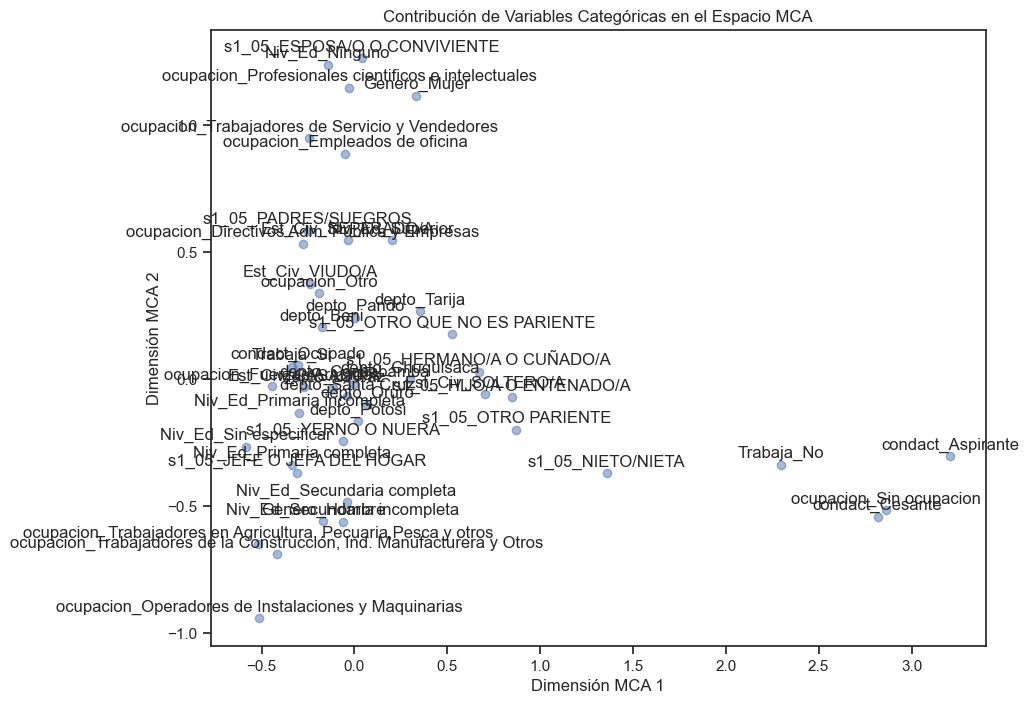

In [109]:
# Obtén las coordenadas de las categorías en las dimensiones MCA
category_coordinates = mca.column_coordinates(df_original[categorical_vars])

# Visualiza la contribución de las variables categóricas en el espacio MCA
plt.figure(figsize=(10, 8))
plt.scatter(category_coordinates.iloc[:, 0], category_coordinates.iloc[:, 1], alpha=0.5)
plt.title('Contribución de Variables Categóricas en el Espacio MCA')
plt.xlabel('Dimensión MCA 1')
plt.ylabel('Dimensión MCA 2')
for category, (x, y) in category_coordinates.iterrows():
    plt.annotate(category, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()


In [110]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

# Codifica las etiquetas categóricas si es necesario
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(combined_data_imputed['cluster'])

# Inercia (menor es mejor)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Puntuación de silueta (mayor es mejor)
silhouette_avg = silhouette_score(combined_data_imputed[cluster_columns], combined_data_imputed['cluster'])
print(f"Puntuación de silueta: {silhouette_avg}")

# Completitud, homogeneidad y puntuación V (mayor es mejor)
completeness = completeness_score(true_labels, combined_data_imputed['cluster'])
homogeneity = homogeneity_score(true_labels, combined_data_imputed['cluster'])
v_measure = v_measure_score(true_labels, combined_data_imputed['cluster'])

print(f"Completitud: {completeness}")
print(f"Homogeneidad: {homogeneity}")
print(f"Puntuación V: {v_measure}")


Inercia: 4696.943454682258
Puntuación de silueta: 0.5819156404782206
Completitud: 1.0
Homogeneidad: 1.0
Puntuación V: 1.0


In [113]:
import scipy.stats as stats

# Lista de variables categóricas
categorical_variables = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
                          'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra', 'ingresos_categoria',
                          'tiempo_trab_categoria', 'phrs_categoria', 'Nacionalidad']

# Realizar la prueba de chi-cuadrado para cada variable
for variable in categorical_variables:
    # Verificar si la variable está presente en el DataFrame
    if variable in df_1.columns:
        # Obtener los datos
        data = df_1[variable]

        # Realizar la prueba de chi-cuadrado con corrección
        obs = data.value_counts().sort_values(ascending=False)  # Obtener las frecuencias observadas
        chi2, p, dof, expected = stats.chi2_contingency(obs + 0.5)

        # Imprimir los resultados
        print(f"Variable: {variable}")
        print(f"Estadístico de chi-cuadrado: {chi2}")
        print(f"Valor p: {p}")
        print("\n")
    else:
        print(f"La variable '{variable}' no está presente en el DataFrame.")


Variable: depto
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: peao
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Genero
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: s1_05
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Niv_Ed
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Est_Civ
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ocupacion
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Trabaja
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Cont_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: condact
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


La variable 'Segundo_Trab' no está presente en el DataFrame.
Variable: Aporta_Hog
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


La variable 'pagos_extra' no está presente en el DataFrame.
Variable: ingresos_categoria
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: tiempo_trab_categoria
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


In [114]:

columns_to_drop = ["Nacionalidad", 'Segundo_Trab', 'pagos_extra', 'ingresos', 'tiempo_trab_meses', 'phrs']
df_1 = df_1.drop(columns=columns_to_drop)


KeyError: "['Nacionalidad', 'Segundo_Trab', 'pagos_extra', 'ingresos', 'tiempo_trab_meses', 'phrs'] not found in axis"

In [115]:
df_1.columns


Index(['gestion', 'trimestre', 'id_persona', 'depto', 'peao', 'Genero', 'Edad',
       's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
       'condact', 'Aporta_Hog', 'tasa_desempleo', 'ingresos_categoria',
       'tiempo_trab_categoria', 'phrs_categoria'],
      dtype='object')

## Transformacion One hot encoding

In [116]:
import pandas as pd

categorical_columns = ['peao','depto', 'Genero', 'Cont_Trab', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact', 'Aporta_Hog', 'ingresos_categoria','tiempo_trab_categoria','phrs_categoria']
       

# Aplicar One-Hot Encoding a las variables categóricas
df_enc = pd.get_dummies(df_1, columns=categorical_columns, drop_first=True)

# Asegurarse de manejar correctamente las variables objetivo
X_enc = df_enc.drop('tasa_desempleo', axis=1)
y_enc = df_enc['tasa_desempleo']

# Continuar con el entrenamiento del modelo utilizando X_enc y y_enc

df_enc.head()

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
2,2016,4,748824,46.0,4.42,True,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
3,2016,4,748825,42.0,4.42,True,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
7,2016,4,748832,43.0,4.42,True,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
9,2016,4,748843,58.0,4.42,True,False,False,False,True,...,True,False,True,False,False,True,False,False,False,True
10,2016,4,748844,29.0,4.42,True,False,False,False,True,...,True,False,True,False,False,True,False,False,True,False


In [117]:
# Guardar el DataFrame en un archivo CSV
df_enc.to_csv('df_4t_encoded.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [118]:
dimensiones =df_enc.shape
# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 44661
Número de columnas: 55
